In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
from datetime import datetime

In [102]:
athlete_bio = pd.read_csv('Olympic_Athlete_Biography.csv')
event_details = pd.read_csv('Olympic_Athlete_Event_Details.csv')
country_profiles = pd.read_csv('Olympic_Country_Profiles.csv')
event_results = pd.read_csv('Olympic_Event_Results.csv')
games_summary = pd.read_csv('Olympic_Games_Summary.csv')
medal_tally = pd.read_csv('Olympic_Medal_Tally_History.csv')

# Очистка данных

In [103]:
athlete_bio.head()

,athlete_id,name,sex,born,height,weight,country,country_noc,description,special_notes
0,65649,Ivanka Bonova,Female,4 April 1949,166.0,55,Bulgaria,BUL,Personal Best: 400 – 53.54 (1980).,NaN
1,112510,Nataliya Uryadova,Female,15 March 1977,184.0,70,Russian Federation,RUS,NaN,Listed in Olympians Who Won a Medal at the Eur...
2,114973,Essa Ismail Rashed,Male,14 December 1986,165.0,55,Qatar,QAT,Personal Best: 10000 – 27:20.97 (2006).,Listed in Olympians Who Won a Medal at the Asi...
3,30359,Péter Boros,Male,12 January 1908,NaN,NaN,Hungary,HUN,"Between 1927 and 1938, Péter Boros competed as...",NaN
4,50557,Rudolf Piowatý,Male,28 April 1900,NaN,NaN,Czechoslovakia,TCH,Rudolf Piowaty joined the Czechoslovak militar...,NaN


In [104]:
print(athlete_bio.head())
print(athlete_bio.info())

print(event_details.head())
print(event_details.info())

print(country_profiles.head())
print(country_profiles.info())

print(event_results.head())
print(event_results.info())

print(games_summary.head())
print(games_summary.info())

print(medal_tally.head())
print(medal_tally.info())

   athlete_id                name     sex              born  height weight  \
0       65649       Ivanka Bonova  Female      4 April 1949   166.0     55   
1      112510   Nataliya Uryadova  Female     15 March 1977   184.0     70   
2      114973  Essa Ismail Rashed    Male  14 December 1986   165.0     55   
3       30359         Péter Boros    Male   12 January 1908     NaN    NaN   
4       50557      Rudolf Piowatý    Male     28 April 1900     NaN    NaN   

               country country_noc  \
0             Bulgaria         BUL   
1   Russian Federation         RUS   
2                Qatar         QAT   
3              Hungary         HUN   
4       Czechoslovakia         TCH   

                                         description  \
0                 Personal Best: 400 – 53.54 (1980).   
1                                                NaN   
2            Personal Best: 10000 – 27:20.97 (2006).   
3  Between 1927 and 1938, Péter Boros competed as...   
4  Rudolf Piowaty join

In [105]:
athlete_bio.isna().sum()

athlete_id            0
name                  0
sex                   0
born               4053
height            50749
weight            50749
country               0
country_noc           0
description      100998
special_notes     95224
dtype: int64

In [106]:
athlete_bio['born'] = pd.to_datetime(athlete_bio['born'], errors='coerce')

# Проверка пропущенных значений после преобразования
print(athlete_bio['born'].isna().sum())

4288


In [107]:
# Заполнение пропущенных значений в столбце 'born' средним значением
# Сначала найдем среднее значение даты рождения
mean_born_date = athlete_bio['born'].dropna().mean()
athlete_bio['born'].fillna(mean_born_date, inplace=True)

In [108]:
athlete_bio['born'].isna().sum()

0

In [109]:
athlete_bio.isna().sum()

athlete_id            0
name                  0
sex                   0
born                  0
height            50749
weight            50749
country               0
country_noc           0
description      100998
special_notes     95224
dtype: int64

In [110]:
# Преобразование столбца 'weight' в числовой формат
athlete_bio['weight'] = pd.to_numeric(athlete_bio['weight'], errors='coerce')

# Заполнение пропущенных значений в столбце 'weight' средним значением
mean_weight = athlete_bio['weight'].mean()
athlete_bio['weight'].fillna(mean_weight, inplace=True)

# Проверка результатов
print(athlete_bio['weight'].isna().sum())

0


In [111]:
athlete_bio.drop(columns=['description', 'special_notes'], inplace=True)

In [112]:
athlete_bio.drop_duplicates(inplace=True)

In [113]:
athlete_bio['country'] = athlete_bio['country'].str.lower()

In [114]:
athlete_bio['country_noc'] = athlete_bio['country_noc'].str.lower()

In [115]:
median_height = athlete_bio['height'].median()
athlete_bio['height'].fillna(median_height, inplace=True)

In [116]:
athlete_bio.head()

,athlete_id,name,sex,born,height,weight,country,country_noc
0,65649,Ivanka Bonova,Female,1949-04-04,166.0,55.000000,bulgaria,bul
1,112510,Nataliya Uryadova,Female,1977-03-15,184.0,70.000000,russian federation,rus
2,114973,Essa Ismail Rashed,Male,1986-12-14,165.0,55.000000,qatar,qat
3,30359,Péter Boros,Male,1908-01-12,176.0,71.868268,hungary,hun
4,50557,Rudolf Piowatý,Male,1900-04-28,176.0,71.868268,czechoslovakia,tch


In [117]:
athlete_bio.isna().sum()

athlete_id     0
name           0
sex            0
born           0
height         0
weight         0
country        0
country_noc    0
dtype: int64

In [118]:
event_details.head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal,isTeamSport
0,1908 Summer Olympics,5,ANZ,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,DNS,NaN,False
1,1908 Summer Olympics,5,ANZ,Athletics,"400 metres, Men",56313,Henry Murray,64756,DNS,NaN,False
2,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,3 h8 r1/2,NaN,False
3,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Guy Haskins,922519,DNS,NaN,False
4,1908 Summer Olympics,5,ANZ,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,DNS,NaN,False


In [119]:
event_details.isna().sum()

edition             0
edition_id          0
country_noc         0
sport               0
event               0
result_id           0
athlete             0
athlete_id          0
pos                 0
medal          272147
isTeamSport         0
dtype: int64

In [120]:
event_details['medal'].fillna('No Medal', inplace=True)

In [121]:
event_details.drop(columns=['pos'], inplace=True)

In [122]:

event_details.drop_duplicates(inplace=True)

In [123]:
print(event_details.dtypes)
event_details['isTeamSport'] = event_details['isTeamSport'].astype(bool)

edition        object
edition_id      int64
country_noc    object
sport          object
event          object
result_id       int64
athlete        object
athlete_id      int64
medal          object
isTeamSport      bool
dtype: object


In [124]:
event_details['country_noc'] = event_details['country_noc'].str.lower()

In [125]:
print(event_details.isna().sum())

edition        0
edition_id     0
country_noc    0
sport          0
event          0
result_id      0
athlete        0
athlete_id     0
medal          0
isTeamSport    0
dtype: int64


In [126]:
event_details.head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,medal,isTeamSport
0,1908 Summer Olympics,5,anz,Athletics,"100 metres, Men",56265,Ernest Hutcheon,64710,No Medal,False
1,1908 Summer Olympics,5,anz,Athletics,"400 metres, Men",56313,Henry Murray,64756,No Medal,False
2,1908 Summer Olympics,5,anz,Athletics,"800 metres, Men",56338,Harvey Sutton,64808,No Medal,False
3,1908 Summer Olympics,5,anz,Athletics,"800 metres, Men",56338,Guy Haskins,922519,No Medal,False
4,1908 Summer Olympics,5,anz,Athletics,"800 metres, Men",56338,Joseph Lynch,64735,No Medal,False


In [127]:
country_profiles.head()

,noc,country
0,AFG,Afghanistan
1,ALB,Albania
2,ALG,Algeria
3,ASA,American Samoa
4,AND,Andorra


In [128]:
print(country_profiles.isna().sum())

noc        0
country    0
dtype: int64


In [129]:
country_profiles.drop_duplicates(inplace=True)

In [130]:
country_profiles['noc'] = country_profiles['noc'].astype(str)

In [131]:
country_profiles['country'] = country_profiles['country'].str.lower()
country_profiles['noc'] = country_profiles['noc'].str.lower()

In [132]:
country_profiles.head()

,noc,country
0,afg,afghanistan
1,alb,albania
2,alg,algeria
3,asa,american samoa
4,and,andorra


In [133]:
event_results.head()

,result_id,event_title,edition,edition_id,sport,sport_url,result_date,result_location,result_participants,result_format,result_detail,result_description
0,30359,"Super-Heavyweight (>105 kilograms), Men",2004 Summer Olympics,26,Weightlifting,/editions/26/sports/WLF,"25 August 2004 — 16:30 (B), 20:00 (A)","Olympiako Gymnastirio Arsis Varon Nikaias, Nikaia",17 from 15 countries,Total of best lifts in snatch and clean & jerk...,na,"Not so much a competition as a coronation, the..."
1,1626,"Giant Slalom, Women1",1998 Winter Olympics,46,Snowboarding,/editions/46/sports/SBD,9 February 1998,"Mt. Yakebitai, Shiga Kogen, Yamanouchi",31 from 14 countries,"Two runs, total time determined placement.",Gates: 38 / 36Length: 936 mStart Altitude: 196...,The women’s giant slalom was postponed one day...
2,76,"Singles, Men",1976 Winter Olympics,40,Luge,/editions/40/sports/LUG,4 – 7 February 1976,"Kunsteis-Bob- und Rodelbahn, Igls",43 from 15 countries,"Four runs, total time determined placement.",Curves: 14Length: 1220 mStart Altitude: ?Verti...,"Once more, the competitors from East and West ..."
3,962,"1,500 metres, Men",1928 Winter Olympics,30,Speed Skating,/editions/30/sports/SSK,14 February 1928 — 9:00,"Olympia-Eisstadion Badrutts Park, St. Moritz",30 from 14 countries,na,na,There was little doubt that the Olympic 1500 m...
4,258824,"Canadian Singles, Slalom, Men",2008 Summer Olympics,53,Canoe Slalom,/editions/53/sports/CSL,11 – 12 August 2008,"Shunyi Aolinpike Shuishang Gongyuan, Mapo, Shunyi",16 from 16 countries,na,na,Two former Olympic champions in the C-1 slalom...


In [134]:
event_results.drop(columns=['result_format'], inplace=True)

In [135]:
event_results.drop(columns=['result_description'], inplace=True)

In [136]:
event_results.drop(columns=['sport_url'], inplace=True)

In [137]:
print(event_results.isna().sum())

result_id              0
event_title            0
edition                0
edition_id             0
sport                  0
result_date            0
result_location        1
result_participants    0
result_detail          0
dtype: int64


In [138]:
event_results.drop_duplicates(inplace=True)

In [139]:
print(event_results.dtypes)

# Преобразование столбца 'result_date' в формат datetime
event_results['result_date'] = pd.to_datetime(event_results['result_date'], errors='coerce')

result_id               int64
event_title            object
edition                object
edition_id              int64
sport                  object
result_date            object
result_location        object
result_participants    object
result_detail          object
dtype: object


In [140]:
# Приведение всех строк в столбце 'event_title' к нижнему регистру
event_results['event_title'] = event_results['event_title'].str.lower()

In [141]:
# Заполнение пропущенных значений в столбце 'result_date' текущей датой
event_results['result_date'].fillna(pd.Timestamp.now(), inplace=True)

In [142]:
event_results['result_date'] = pd.to_datetime(event_results['result_date'], errors='coerce')

event_results['result_date'] = event_results['result_date'].dt.date

In [143]:
print(event_results.dtypes)

result_id               int64
event_title            object
edition                object
edition_id              int64
sport                  object
result_date            object
result_location        object
result_participants    object
result_detail          object
dtype: object


In [144]:
event_results['result_location'].fillna('Unknown', inplace=True)

In [145]:
event_results.drop_duplicates(inplace=True)

In [146]:
event_results.head()

,result_id,event_title,edition,edition_id,sport,result_date,result_location,result_participants,result_detail
0,30359,"super-heavyweight (>105 kilograms), men",2004 Summer Olympics,26,Weightlifting,2024-12-16,"Olympiako Gymnastirio Arsis Varon Nikaias, Nikaia",17 from 15 countries,na
1,1626,"giant slalom, women1",1998 Winter Olympics,46,Snowboarding,1998-02-09,"Mt. Yakebitai, Shiga Kogen, Yamanouchi",31 from 14 countries,Gates: 38 / 36Length: 936 mStart Altitude: 196...
2,76,"singles, men",1976 Winter Olympics,40,Luge,2024-12-16,"Kunsteis-Bob- und Rodelbahn, Igls",43 from 15 countries,Curves: 14Length: 1220 mStart Altitude: ?Verti...
3,962,"1,500 metres, men",1928 Winter Olympics,30,Speed Skating,2024-12-16,"Olympia-Eisstadion Badrutts Park, St. Moritz",30 from 14 countries,na
4,258824,"canadian singles, slalom, men",2008 Summer Olympics,53,Canoe Slalom,2024-12-16,"Shunyi Aolinpike Shuishang Gongyuan, Mapo, Shunyi",16 from 16 countries,na


In [147]:
print(event_results.isna().sum())

result_id              0
event_title            0
edition                0
edition_id             0
sport                  0
result_date            0
result_location        0
result_participants    0
result_detail          0
dtype: int64


In [148]:
games_summary.head()

,edition,edition_id,edition_url,year,city,country_flag_url,country_noc,start_date,end_date,competition_date,isHeld
0,1896 Summer Olympics,1,/editions/1,1896,Athina,https://olympedia-flags.s3.eu-central-1.amazon...,GRE,6 April,15 April,6 – 13 April,NaN
1,1900 Summer Olympics,2,/editions/2,1900,Paris,https://olympedia-flags.s3.eu-central-1.amazon...,FRA,NaN,NaN,14 May – 28 October,NaN
2,1904 Summer Olympics,3,/editions/3,1904,St. Louis,https://olympedia-flags.s3.eu-central-1.amazon...,USA,14 May,NaN,1 July – 26 November,NaN
3,1908 Summer Olympics,5,/editions/5,1908,London,https://olympedia-flags.s3.eu-central-1.amazon...,GBR,13 July,25 July,27 April – 31 October,NaN
4,1912 Summer Olympics,6,/editions/6,1912,Stockholm,https://olympedia-flags.s3.eu-central-1.amazon...,SWE,6 July,15 July,5 May – 27 July,NaN


In [149]:
games_summary.drop(columns=['isHeld'], inplace=True)

In [150]:
games_summary.drop(columns=['edition_url'], inplace=True)

In [151]:
games_summary.drop(columns=['country_flag_url'], inplace=True)

In [152]:
print(games_summary.isna().sum())

edition              0
edition_id           0
year                 0
city                 0
country_noc          0
start_date           9
end_date            10
competition_date     0
dtype: int64


In [153]:
games_summary['start_date'] = pd.to_datetime(games_summary['start_date'], format='%d %B', errors='coerce')
games_summary['end_date'] = pd.to_datetime(games_summary['end_date'], format='%d %B', errors='coerce')

In [154]:
games_summary.drop(columns=['competition_date'], inplace=True)

In [155]:
games_summary['start_date'].fillna('Unknown', inplace=True)
games_summary['end_date'].fillna('Unknown', inplace=True)

In [156]:
games_summary['country_noc'] = games_summary['country_noc'].str.lower()

In [157]:
games_summary['city'] = games_summary['city'].str.lower()

In [158]:
games_summary.drop_duplicates(inplace=True)

In [159]:
games_summary.head()

,edition,edition_id,year,city,country_noc,start_date,end_date
0,1896 Summer Olympics,1,1896,athina,gre,1900-04-06 00:00:00,1900-04-15 00:00:00
1,1900 Summer Olympics,2,1900,paris,fra,Unknown,Unknown
2,1904 Summer Olympics,3,1904,st. louis,usa,1900-05-14 00:00:00,Unknown
3,1908 Summer Olympics,5,1908,london,gbr,1900-07-13 00:00:00,1900-07-25 00:00:00
4,1912 Summer Olympics,6,1912,stockholm,swe,1900-07-06 00:00:00,1900-07-15 00:00:00


In [160]:
print(games_summary.isna().sum())

edition        0
edition_id     0
year           0
city           0
country_noc    0
start_date     0
end_date       0
dtype: int64


In [161]:
medal_tally.head()

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7


In [162]:
medal_tally.isna().sum()

edition        0
edition_id     0
year           0
country        0
country_noc    0
gold           0
silver         0
bronze         0
total          0
dtype: int64

In [163]:
# Приведение всех строк в столбце 'country' к нижнему регистру
medal_tally['country'] = medal_tally['country'].str.lower()

In [164]:
# Приведение всех строк в столбце 'country' к нижнему регистру
medal_tally['country_noc'] = medal_tally['country_noc'].str.lower()

In [165]:
print(medal_tally.dtypes)

medal_tally['gold'] = medal_tally['gold'].astype(int)
medal_tally['silver'] = medal_tally['silver'].astype(int)
medal_tally['bronze'] = medal_tally['bronze'].astype(int)
medal_tally['total'] = medal_tally['total'].astype(int)

edition        object
edition_id      int64
year            int64
country        object
country_noc    object
gold            int64
silver          int64
bronze          int64
total           int64
dtype: object


In [166]:
medal_tally.drop_duplicates(inplace=True)

In [167]:
medal_tally.head()

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
0,1896 Summer Olympics,1,1896,united states,usa,11,7,2,20
1,1896 Summer Olympics,1,1896,greece,gre,10,18,19,47
2,1896 Summer Olympics,1,1896,germany,ger,6,5,2,13
3,1896 Summer Olympics,1,1896,france,fra,5,4,2,11
4,1896 Summer Olympics,1,1896,great britain,gbr,2,3,2,7


# Анализ данных

In [168]:
def extract_season(edition):
    if 'Summer' in edition:
        return 'Summer'
    elif 'Winter' in edition:
        return 'Winter'
    else:
        return 'na'
games_summary['season'] = games_summary['edition'].apply(extract_season)
games_summary.head()

,edition,edition_id,year,city,country_noc,start_date,end_date,season
0,1896 Summer Olympics,1,1896,athina,gre,1900-04-06 00:00:00,1900-04-15 00:00:00,Summer
1,1900 Summer Olympics,2,1900,paris,fra,Unknown,Unknown,Summer
2,1904 Summer Olympics,3,1904,st. louis,usa,1900-05-14 00:00:00,Unknown,Summer
3,1908 Summer Olympics,5,1908,london,gbr,1900-07-13 00:00:00,1900-07-25 00:00:00,Summer
4,1912 Summer Olympics,6,1912,stockholm,swe,1900-07-06 00:00:00,1900-07-15 00:00:00,Summer


In [169]:
athlete_event_results_df = pd.merge(
    event_details.filter(items=['athlete_id', 'result_id', 'pos', 'medal', 'isTeamSport']),
    athlete_bio,
    how='left',
    on='athlete_id')

athlete_event_results_df = pd.merge(
    athlete_event_results_df,
    event_results,
    how='left',
    on='result_id')

athlete_event_results_df = pd.merge(
    athlete_event_results_df,
    games_summary.filter(items=['edition_id', 'year', 'season']),
    how='left',
    on='edition_id')

athlete_event_results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315579 entries, 0 to 315578
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   athlete_id           315579 non-null  int64         
 1   result_id            315579 non-null  int64         
 2   medal                315579 non-null  object        
 3   isTeamSport          315579 non-null  bool          
 4   name                 315572 non-null  object        
 5   sex                  315572 non-null  object        
 6   born                 315572 non-null  datetime64[ns]
 7   height               315572 non-null  float64       
 8   weight               315572 non-null  float64       
 9   country              315572 non-null  object        
 10  country_noc          315572 non-null  object        
 11  event_title          315475 non-null  object        
 12  edition              315475 non-null  object        
 13  edition_id    

In [170]:
filtered_athlete_event_results_df = athlete_event_results_df.filter(items=['year', 'country_noc', 'sex', 'season'])
athlete_to_year_df = filtered_athlete_event_results_df.groupby(['year','sex', 'season'])['year'].count().reset_index(name="player_count")
athlete_to_year_df

,year,sex,season,player_count
0,1896.0,Female,Summer,2
1,1896.0,Male,Summer,617
2,1900.0,Female,Summer,71
3,1900.0,Male,Summer,4245
4,1904.0,Female,Summer,17
...,...,...,...,...
104,2018.0,Male,Winter,3036
105,2020.0,Female,Summer,7126
106,2020.0,Male,Summer,7585
107,2022.0,Female,Winter,2450


<AxesSubplot:xlabel='year', ylabel='player_count'>

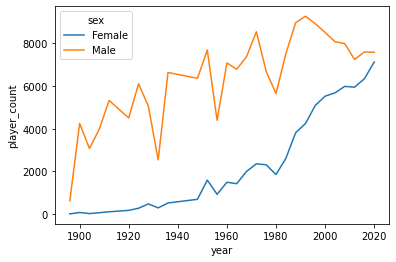

In [171]:
summer_athlete_to_year_df = athlete_to_year_df[athlete_to_year_df['season'] == 'Summer']
sns.lineplot(data=summer_athlete_to_year_df, x='year', y='player_count', hue='sex')

<AxesSubplot:xlabel='year', ylabel='player_count'>

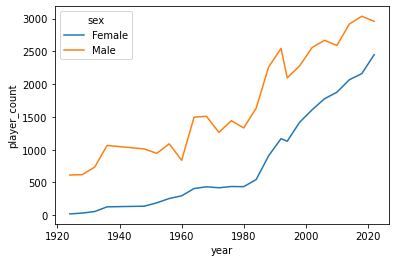

In [172]:
winter_athlete_to_year_df = athlete_to_year_df[athlete_to_year_df['season'] == 'Winter']
sns.lineplot(data=winter_athlete_to_year_df, x='year', y='player_count', hue='sex')

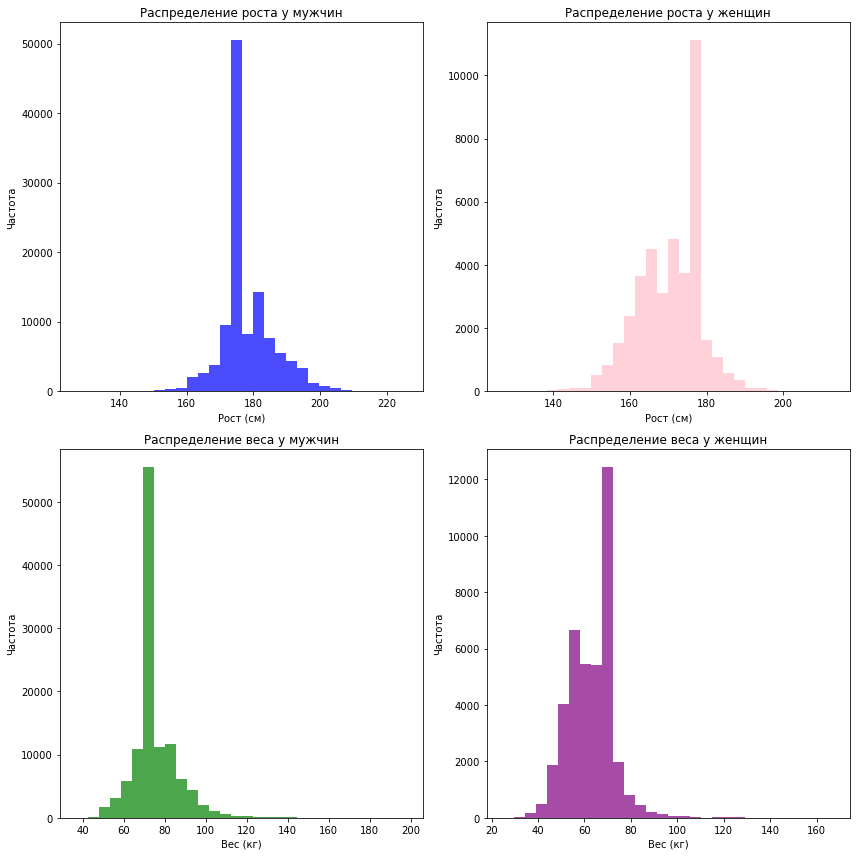

Средний рост у мужчин: 178.24 см
Медианный рост у мужчин: 176.00 см
Модальный рост у мужчин: 176.00 см
Средний рост у женщин: 170.44 см
Медианный рост у женщин: 172.00 см
Модальный рост у женщин: 176.00 см
Средний вес у мужчин: 74.76 кг
Медианный вес у мужчин: 71.87 кг
Модальный вес у мужчин: 71.87 кг
Средний вес у женщин: 63.57 кг
Медианный вес у женщин: 64.00 кг
Модальный вес у женщин: 71.87 кг


In [173]:
male_athletes = athlete_bio[athlete_bio['sex'] == 'Male']
female_athletes = athlete_bio[athlete_bio['sex'] == 'Female']

# Гистограммы роста и веса для мужчин и женщин
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
plt.hist(male_athletes['height'], bins=30, color='blue', alpha=0.7)
plt.title('Распределение роста у мужчин')
plt.xlabel('Рост (см)')
plt.ylabel('Частота')

plt.subplot(2, 2, 2)
plt.hist(female_athletes['height'], bins=30, color='pink', alpha=0.7)
plt.title('Распределение роста у женщин')
plt.xlabel('Рост (см)')
plt.ylabel('Частота')

plt.subplot(2, 2, 3)
plt.hist(male_athletes['weight'], bins=30, color='green', alpha=0.7)
plt.title('Распределение веса у мужчин')
plt.xlabel('Вес (кг)')
plt.ylabel('Частота')

plt.subplot(2, 2, 4)
plt.hist(female_athletes['weight'], bins=30, color='purple', alpha=0.7)
plt.title('Распределение веса у женщин')
plt.xlabel('Вес (кг)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

# Среднее, медианное и модальное значение роста и веса для мужчин и женщин
male_height_mean = male_athletes['height'].mean()
male_height_median = male_athletes['height'].median()
male_height_mode = male_athletes['height'].mode()[0]

female_height_mean = female_athletes['height'].mean()
female_height_median = female_athletes['height'].median()
female_height_mode = female_athletes['height'].mode()[0]

male_weight_mean = male_athletes['weight'].mean()
male_weight_median = male_athletes['weight'].median()
male_weight_mode = male_athletes['weight'].mode()[0]

female_weight_mean = female_athletes['weight'].mean()
female_weight_median = female_athletes['weight'].median()
female_weight_mode = female_athletes['weight'].mode()[0]

print(f"Средний рост у мужчин: {male_height_mean:.2f} см")
print(f"Медианный рост у мужчин: {male_height_median:.2f} см")
print(f"Модальный рост у мужчин: {male_height_mode:.2f} см")

print(f"Средний рост у женщин: {female_height_mean:.2f} см")
print(f"Медианный рост у женщин: {female_height_median:.2f} см")
print(f"Модальный рост у женщин: {female_height_mode:.2f} см")

print(f"Средний вес у мужчин: {male_weight_mean:.2f} кг")
print(f"Медианный вес у мужчин: {male_weight_median:.2f} кг")
print(f"Модальный вес у мужчин: {male_weight_mode:.2f} кг")

print(f"Средний вес у женщин: {female_weight_mean:.2f} кг")
print(f"Медианный вес у женщин: {female_weight_median:.2f} кг")
print(f"Модальный вес у женщин: {female_weight_mode:.2f} кг")

Количество мужчин и женщин:
Male      115527
Female     40334
Name: sex, dtype: int64

Процентное соотношение мужчин и женщин:
Male      74.121814
Female    25.878186
Name: sex, dtype: float64


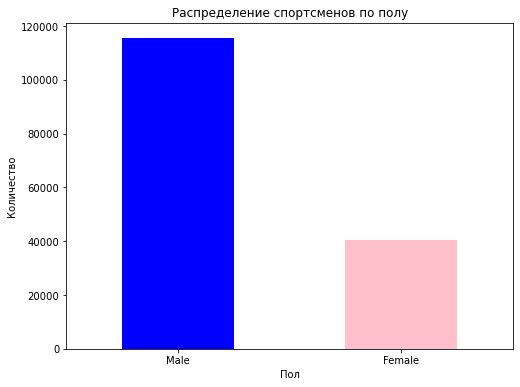

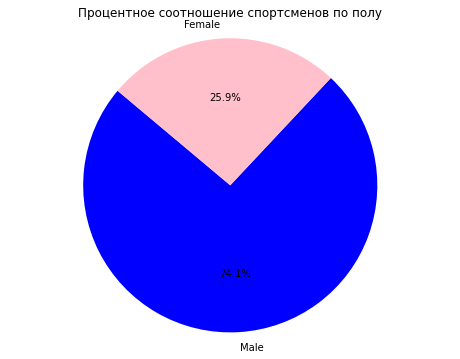

In [174]:
# Подсчет количества мужчин и женщин
gender_counts = athlete_bio['sex'].value_counts()

# Процентное соотношение мужчин и женщин
gender_percentages = gender_counts / gender_counts.sum() * 100

# Вывод результатов
print("Количество мужчин и женщин:")
print(gender_counts)

print("\nПроцентное соотношение мужчин и женщин:")
print(gender_percentages)

# Визуализация распределения по полу
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Распределение спортсменов по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

# Визуализация процентного соотношения по полу в виде круговой диаграммы
plt.figure(figsize=(8, 6))
plt.pie(gender_percentages, labels=gender_percentages.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'pink'])
plt.title('Процентное соотношение спортсменов по полу')
plt.axis('equal')  # Равные оси для круговой диаграммы
plt.show()

Корреляционная матрица:
          height    weight
height  1.000000  0.776313
weight  0.776313  1.000000


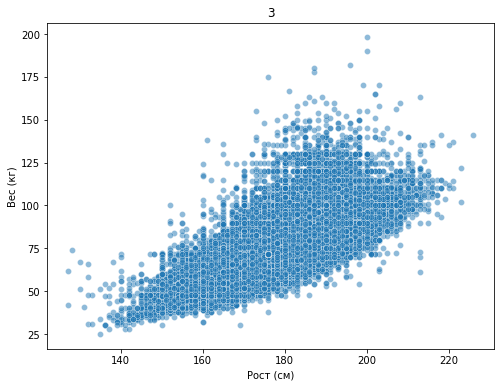

In [175]:
athlete_bio = athlete_bio[(athlete_bio['height'] > 0) & (athlete_bio['weight'] > 0)]

# Корреляционная матрица
correlation_matrix = athlete_bio[['height', 'weight']].corr()

# Вывод корреляционной матрицы
print("Корреляционная матрица:")
print(correlation_matrix)

# График рассеяния
plt.figure(figsize=(8, 6))
sns.scatterplot(x='height', y='weight', data=athlete_bio, alpha=0.5)
plt.title('3')
plt.xlabel('Рост (см)')
plt.ylabel('Вес (кг)')
plt.show()


In [176]:
merged_data = pd.merge(athlete_bio, event_details, on='athlete_id', how='inner')

# Удаление пропущенных значений
merged_data = merged_data.dropna(subset=['height', 'weight', 'sport'])

# Удаление строк с некорректными значениями роста и веса
merged_data = merged_data[(merged_data['height'] > 0) & (merged_data['weight'] > 0)]

# Вычисление средних значений роста и веса для каждого вида спорта
mean_height_weight = merged_data.groupby('sport')[['height', 'weight']].mean()

# Вывод средних значений
print("Средние значения роста и веса для каждого вида спорта:")
print(mean_height_weight)

Средние значения роста и веса для каждого вида спорта:
                       height     weight
sport                                   
3x3 Basketball     177.093750  73.032751
Aeronautics        176.000000  71.868268
Alpine Skiing      174.405016  72.294481
Alpinism           176.000000  71.868268
American Football  176.146226  72.335136
...                       ...        ...
Waterskiing        176.000000  71.868268
Weightlifting      169.834345  76.023666
Winter Pentathlon  176.142857  71.315658
Wrestling          173.412741  74.521515
Wushu              173.305785  68.432032

[112 rows x 2 columns]


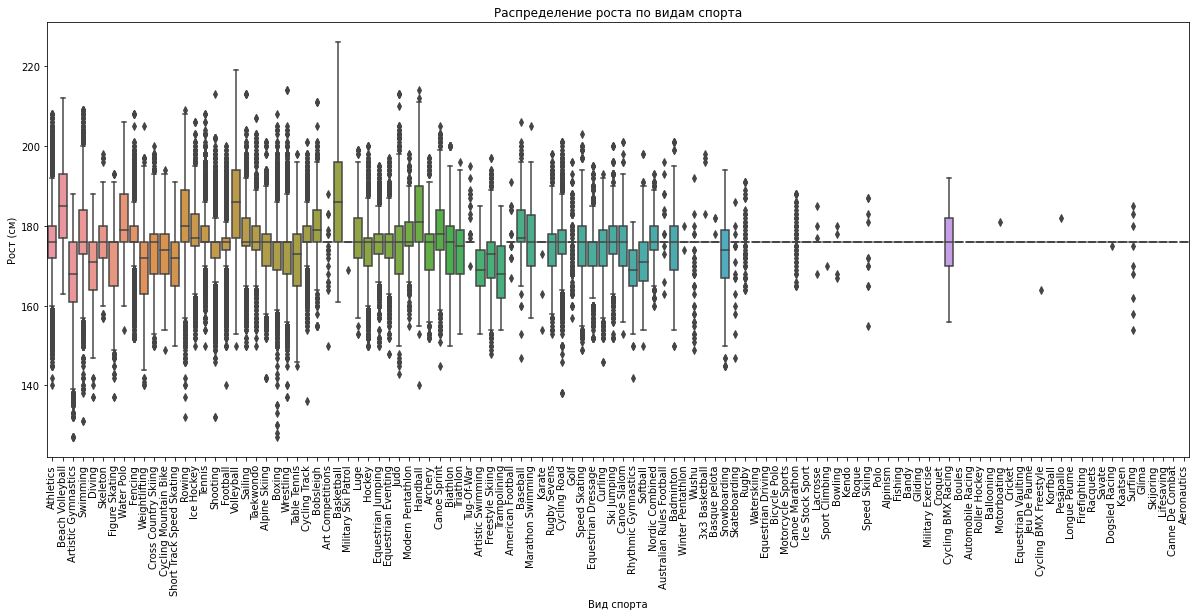

In [177]:
# Коробчатые диаграммы для сравнения
plt.figure(figsize=(45, 8))

plt.subplot(1, 2, 1)
sns.boxplot(x='sport', y='height', data=merged_data)
plt.title('Распределение роста по видам спорта')
plt.xlabel('Вид спорта')
plt.ylabel('Рост (см)')
plt.xticks(rotation=90)
plt.show()

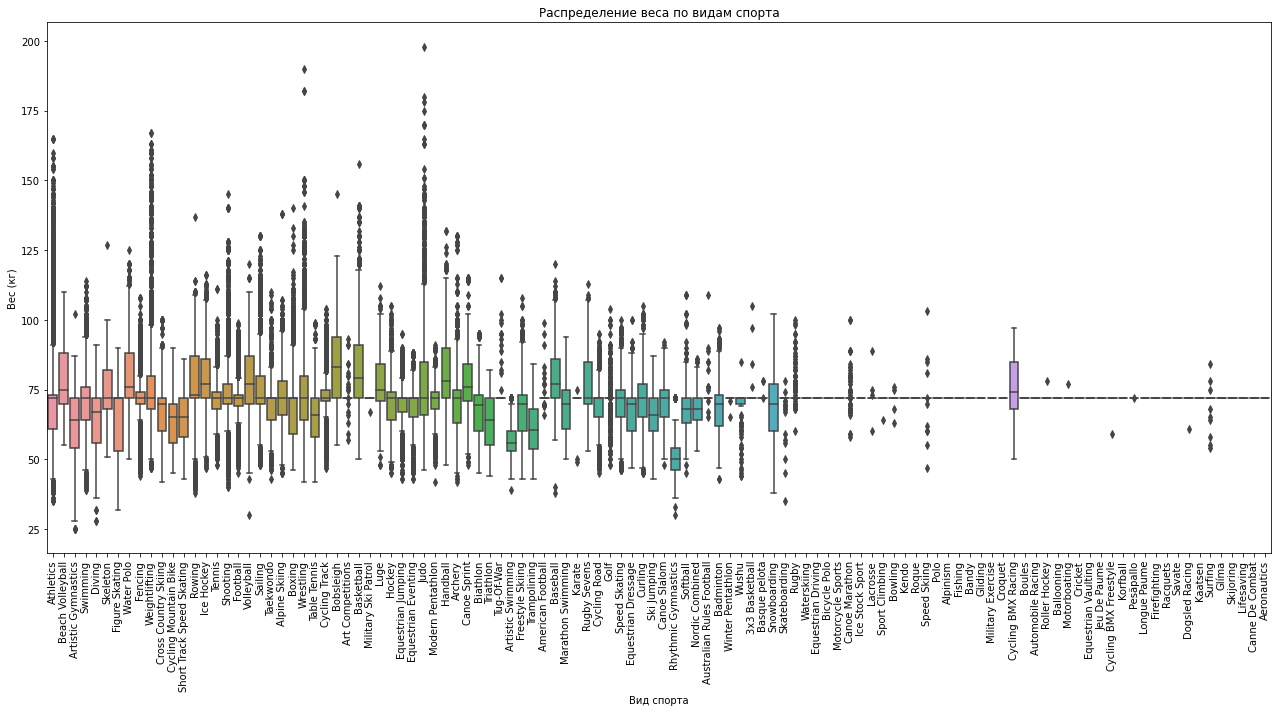

In [178]:
plt.figure(figsize=(35, 10))
plt.subplot(1, 2, 2)
sns.boxplot(x='sport', y='weight', data=merged_data)
plt.title('Распределение веса по видам спорта')
plt.xlabel('Вид спорта')
plt.ylabel('Вес (кг)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Процентное соотношение мужчин и женщин в каждом виде спорта:
sex                   Female        Male
sport                                   
3x3 Basketball     50.000000   50.000000
Aeronautics         0.000000  100.000000
Alpine Skiing      39.328629   60.671371
Alpinism            1.136364   98.863636
American Football   0.000000  100.000000
...                      ...         ...
Waterskiing        26.229508   73.770492
Weightlifting      13.650717   86.349283
Winter Pentathlon   0.000000  100.000000
Wrestling           5.398839   94.601161
Wushu              41.322314   58.677686

[112 rows x 2 columns]


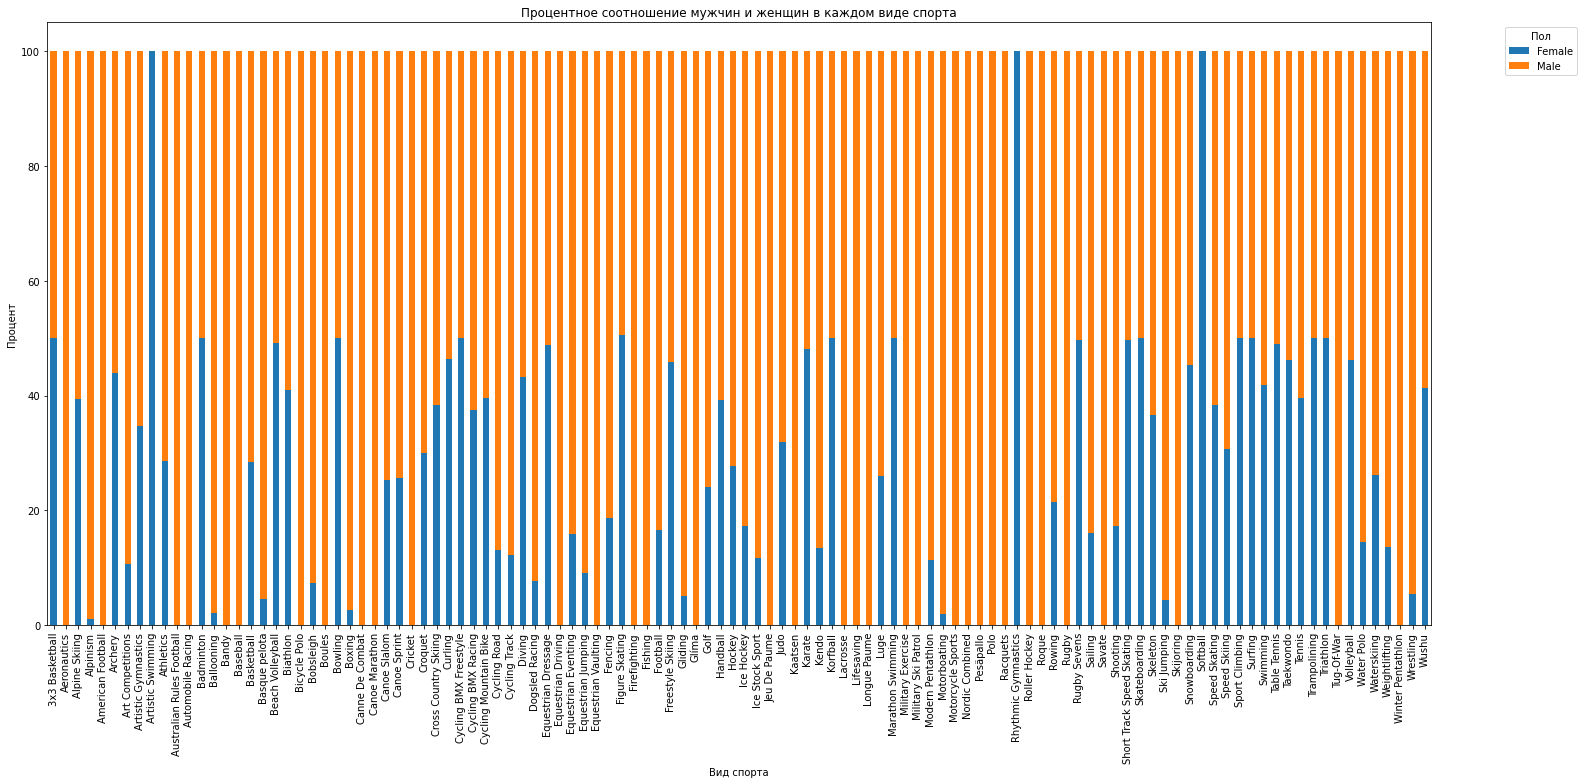

In [179]:
merged_2 = pd.merge(athlete_bio, event_details, on='athlete_id', how='inner')

# Удаление пропущенных значений
merged_2 = merged_2.dropna(subset=['sex', 'sport'])

# Подсчет количества мужчин и женщин в каждом виде спорта
gender_counts = merged_2.groupby(['sport', 'sex']).size().unstack(fill_value=0)

# Вычисление процентного соотношения
gender_percentages = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100

# Вывод результатов
print("Процентное соотношение мужчин и женщин в каждом виде спорта:")
print(gender_percentages)

# Визуализация процентного соотношения по полу в каждом виде спорта
gender_percentages.plot(kind='bar', stacked=True, figsize=(22, 11))
plt.title('Процентное соотношение мужчин и женщин в каждом виде спорта')
plt.xlabel('Вид спорта')
plt.ylabel('Процент')
plt.xticks(rotation=90)
plt.legend(title='Пол', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Средние значения роста и веса для каждой из 20 стран:
                                 height     weight
country                                           
 australia                   177.370680  73.079209
 austria                     176.691078  72.841660
 canada                      176.287342  72.268921
 finland                     176.560243  71.924564
 france                      176.217295  71.516279
 germany                     177.656740  73.184910
 great britain               176.332237  71.677345
 hungary                     176.996187  73.113957
 italy                       176.520412  72.038969
 japan                       171.469667  66.903040
 netherlands                 178.237243  73.183654
 norway                      177.586554  73.098940
 people's republic of china  174.864873  69.251381
 poland                      176.703034  72.911882
 republic of korea           173.963107  69.097367
 soviet union                176.787868  74.042560
 spain                      

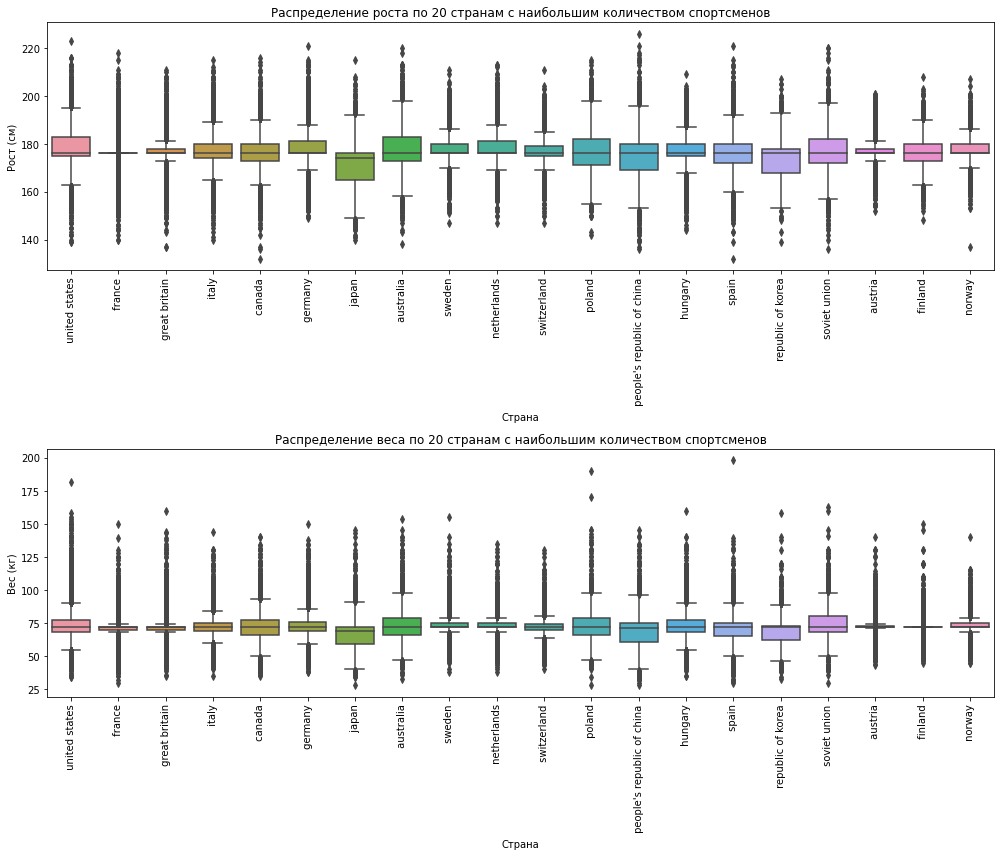

In [180]:
# Подсчет количества спортсменов в каждой стране
country_counts = athlete_bio['country'].value_counts()

# Выбор 20 стран с наибольшим количеством спортсменов
top_20_countries = country_counts.head(20).index

# Фильтрация данных для этих 20 стран
top_20_athletes = athlete_bio[athlete_bio['country'].isin(top_20_countries)]

# Вычисление средних значений роста и веса для каждой страны
mean_height_weight = top_20_athletes.groupby('country')[['height', 'weight']].mean()

# Вывод средних значений
print("Средние значения роста и веса для каждой из 20 стран:")
print(mean_height_weight)

# Коробчатые диаграммы для сравнения
plt.figure(figsize=(14, 12))

plt.subplot(2, 1, 1)
sns.boxplot(x='country', y='height', data=top_20_athletes, order=top_20_countries)
plt.title('Распределение роста по 20 странам с наибольшим количеством спортсменов')
plt.xlabel('Страна')
plt.ylabel('Рост (см)')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.boxplot(x='country', y='weight', data=top_20_athletes, order=top_20_countries)
plt.title('Распределение веса по 20 странам с наибольшим количеством спортсменов')
plt.xlabel('Страна')
plt.ylabel('Вес (кг)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Процентное соотношение мужчин и женщин в каждой из 20 стран:
sex                             Female       Male
country                                          
 united states               26.054230  73.945770
 france                      17.698309  82.301691
 great britain               25.375268  74.624732
 italy                       21.820809  78.179191
 canada                      34.484629  65.515371
 germany                     28.079675  71.920325
 japan                       32.282041  67.717959
 australia                   34.423568  65.576432
 sweden                      21.308367  78.691633
 netherlands                 30.498534  69.501466
 switzerland                 19.898112  80.101888
 poland                      24.456022  75.543978
 people's republic of china  54.545455  45.454545
 hungary                     22.656498  77.343502
 spain                       24.926398  75.073602
 republic of korea           35.189784  64.810216
 soviet union                23.198529 

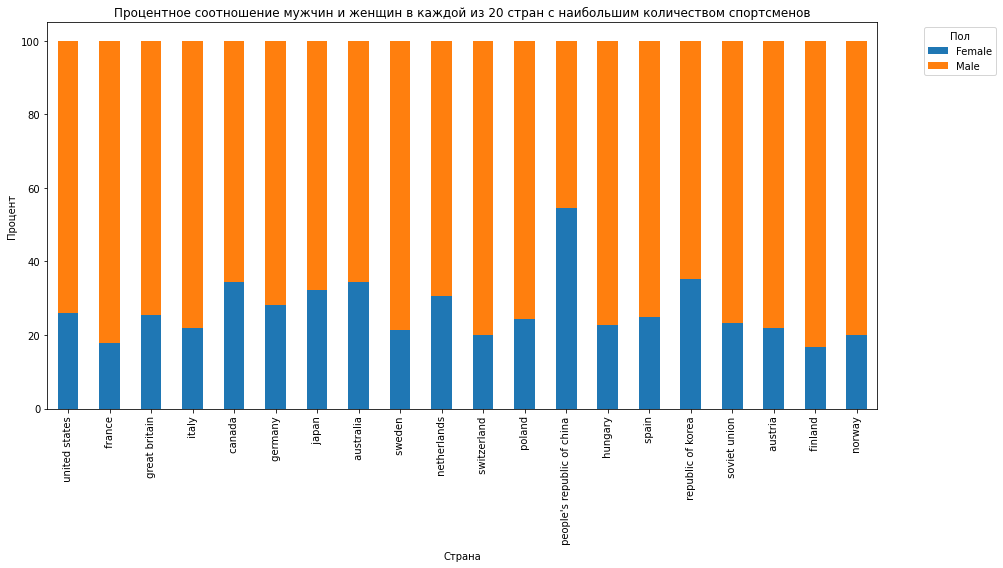

In [181]:
# Подсчет количества мужчин и женщин в каждой стране
gender_counts = athlete_bio.groupby(['country', 'sex']).size().unstack(fill_value=0)

# Вычисление процентного соотношения
gender_percentages = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100

# Выбор 20 стран с наибольшим количеством спортсменов
top_20_countries = gender_counts.sum(axis=1).sort_values(ascending=False).head(20).index

# Фильтрация данных для этих 20 стран
gender_percentages_top_20 = gender_percentages.loc[top_20_countries]

print("Процентное соотношение мужчин и женщин в каждой из 20 стран:")
print(gender_percentages_top_20)

# Визуализация процентного соотношения по полу в каждой стране в виде столбчатых диаграмм
gender_percentages_top_20.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Процентное соотношение мужчин и женщин в каждой из 20 стран с наибольшим количеством спортсменов')
plt.xlabel('Страна')
plt.ylabel('Процент')
plt.xticks(rotation=90)
plt.legend(title='Пол', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [182]:
print(athlete_bio.head())
print(athlete_bio.info())

print(event_details.head())
print(event_details.info())

print(country_profiles.head())
print(country_profiles.info())

print(event_results.head())
print(event_results.info())

print(games_summary.head())
print(games_summary.info())

print(medal_tally.head())
print(medal_tally.info())

   athlete_id                name     sex       born  height     weight  \
0       65649       Ivanka Bonova  Female 1949-04-04   166.0  55.000000   
1      112510   Nataliya Uryadova  Female 1977-03-15   184.0  70.000000   
2      114973  Essa Ismail Rashed    Male 1986-12-14   165.0  55.000000   
3       30359         Péter Boros    Male 1908-01-12   176.0  71.868268   
4       50557      Rudolf Piowatý    Male 1900-04-28   176.0  71.868268   

               country country_noc  
0             bulgaria         bul  
1   russian federation         rus  
2                qatar         qat  
3              hungary         hun  
4       czechoslovakia         tch  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 155861 entries, 0 to 155860
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   athlete_id   155861 non-null  int64         
 1   name         155861 non-null  object        
 2   sex         

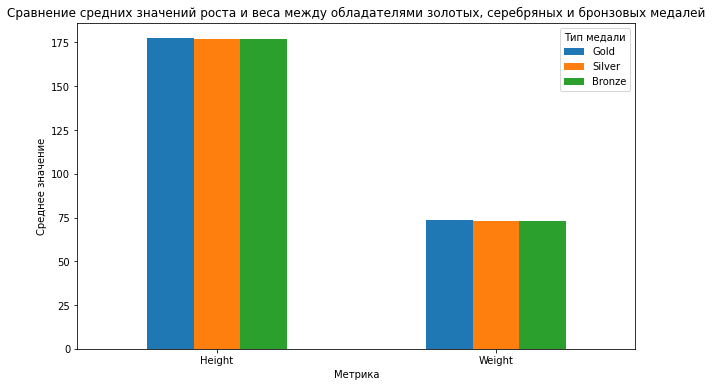

In [183]:
merged_3 = pd.merge(athlete_bio, event_details, on='athlete_id', how='inner')

# Разделение данных на группы по типу медали
gold_medalists = merged_3[merged_3['medal'] == 'Gold']
silver_medalists = merged_3[merged_3['medal'] == 'Silver']
bronze_medalists = merged_3[merged_3['medal'] == 'Bronze']

# Вычисление средних значений роста и веса для каждой группы
gold_stats = gold_medalists.agg({
    'height': 'mean',
    'weight': 'mean'
})

silver_stats = silver_medalists.agg({
    'height': 'mean',
    'weight': 'mean'
})

bronze_stats = bronze_medalists.agg({
    'height': 'mean',
    'weight': 'mean'
})

# Создание DataFrame для сравнения
comparison_df = pd.DataFrame({
    'Metric': ['Height', 'Weight'],
    'Gold': gold_stats.values,
    'Silver': silver_stats.values,
    'Bronze': bronze_stats.values
})

# Визуализация результатов
comparison_df.set_index('Metric', inplace=True)
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Сравнение средних значений роста и веса между обладателями золотых, серебряных и бронзовых медалей')
plt.xlabel('Метрика')
plt.ylabel('Среднее значение')
plt.xticks(rotation=0)
plt.legend(title='Тип медали')
plt.show()

# Сохранение объединенны

In [184]:
merged_4 = pd.merge(athlete_bio, event_details, on='athlete_id', how='inner')

In [185]:
merged_4 = pd.merge(merged_4, games_summary[['edition_id', 'year']], on='edition_id', how='left')

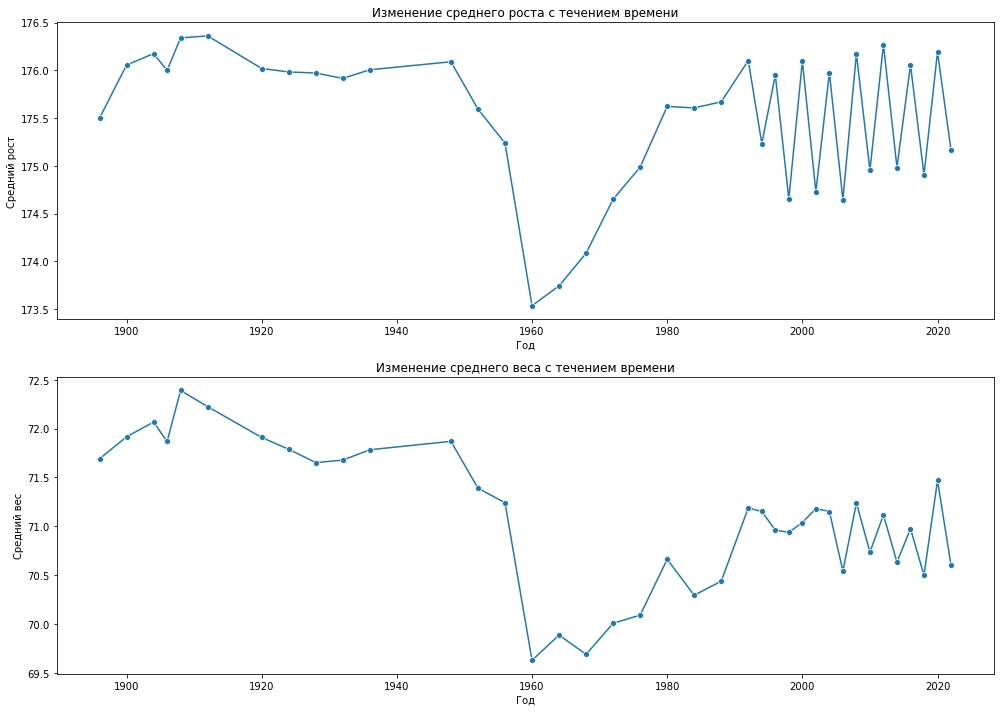

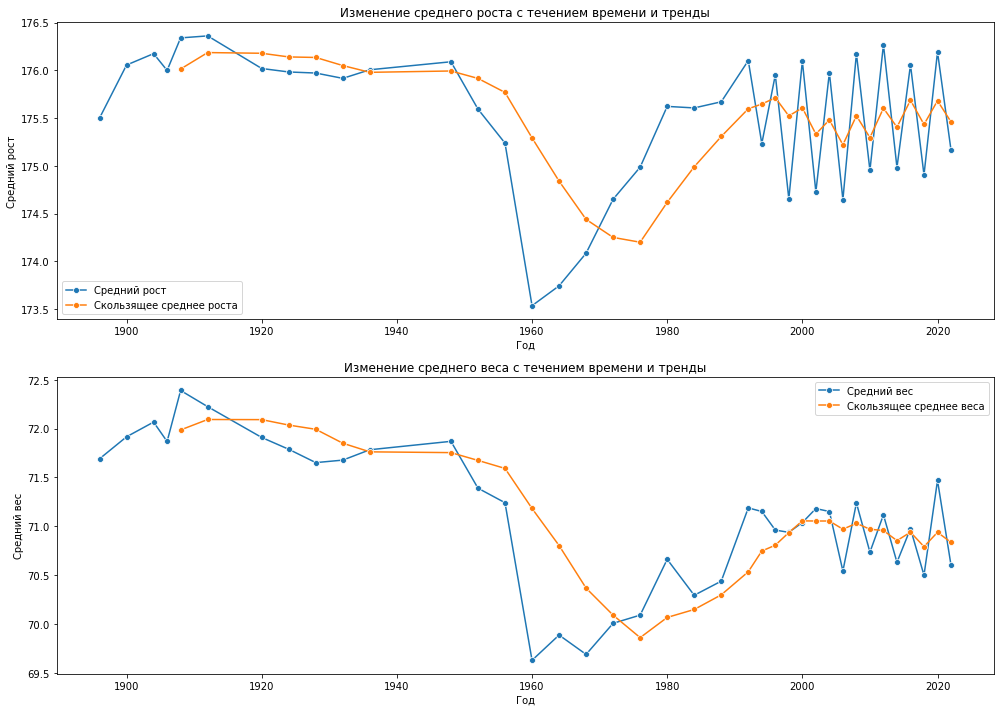

In [186]:
yearly_stats = merged_4.groupby('year').agg({
    'height': 'mean',
    'weight': 'mean'
}).reset_index()

# Построение графиков временных рядов
plt.figure(figsize=(14, 10))

# График изменения среднего роста
plt.subplot(2, 1, 1)
sns.lineplot(data=yearly_stats, x='year', y='height', marker='o')
plt.title('Изменение среднего роста с течением времени')
plt.xlabel('Год')
plt.ylabel('Средний рост')

# График изменения среднего веса
plt.subplot(2, 1, 2)
sns.lineplot(data=yearly_stats, x='year', y='weight', marker='o')
plt.title('Изменение среднего веса с течением времени')
plt.xlabel('Год')
plt.ylabel('Средний вес')

plt.tight_layout()
plt.show()

# Анализ трендов и сезонности
# Для анализа трендов можно использовать скользящее среднее
yearly_stats['height_rolling_mean'] = yearly_stats['height'].rolling(window=5).mean()
yearly_stats['weight_rolling_mean'] = yearly_stats['weight'].rolling(window=5).mean()

# Построение графиков с трендами
plt.figure(figsize=(14, 10))

# График изменения среднего роста с трендом
plt.subplot(2, 1, 1)
sns.lineplot(data=yearly_stats, x='year', y='height', marker='o', label='Средний рост')
sns.lineplot(data=yearly_stats, x='year', y='height_rolling_mean', marker='o', label='Скользящее среднее роста')
plt.title('Изменение среднего роста с течением времени и тренды')
plt.xlabel('Год')
plt.ylabel('Средний рост')
plt.legend()

# График изменения среднего веса с трендом
plt.subplot(2, 1, 2)
sns.lineplot(data=yearly_stats, x='year', y='weight', marker='o', label='Средний вес')
sns.lineplot(data=yearly_stats, x='year', y='weight_rolling_mean', marker='o', label='Скользящее среднее веса')
plt.title('Изменение среднего веса с течением времени и тренды')
plt.xlabel('Год')
plt.ylabel('Средний вес')
plt.legend()

plt.tight_layout()
plt.show()


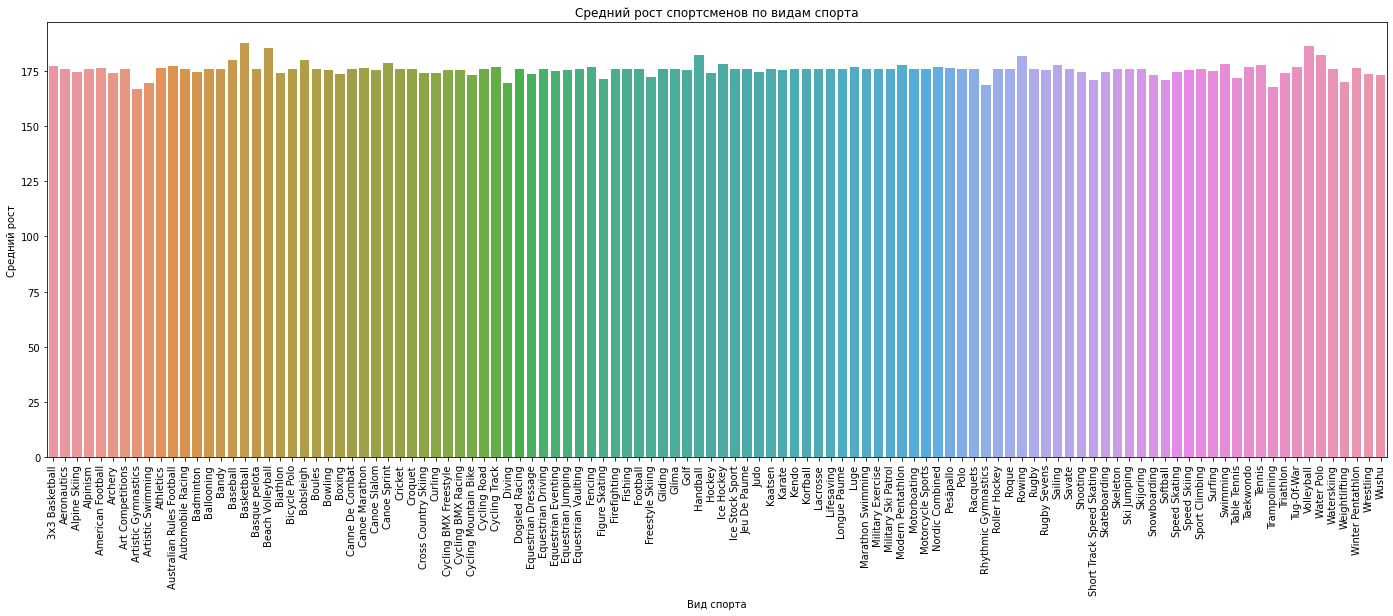

In [187]:
merged_5 = pd.merge(athlete_bio, event_details, on='athlete_id', how='inner')

# Группировка данных по видам спорта и вычисление среднего роста
sport_height_stats = merged_5.groupby('sport').agg({
    'height': 'mean'
}).reset_index()

# Визуализация результатов
plt.figure(figsize=(24, 8))
sns.barplot(data=sport_height_stats, x='sport', y='height')
plt.title('Средний рост спортсменов по видам спорта')
plt.xlabel('Вид спорта')
plt.ylabel('Средний рост')
plt.xticks(rotation=90)
plt.show()


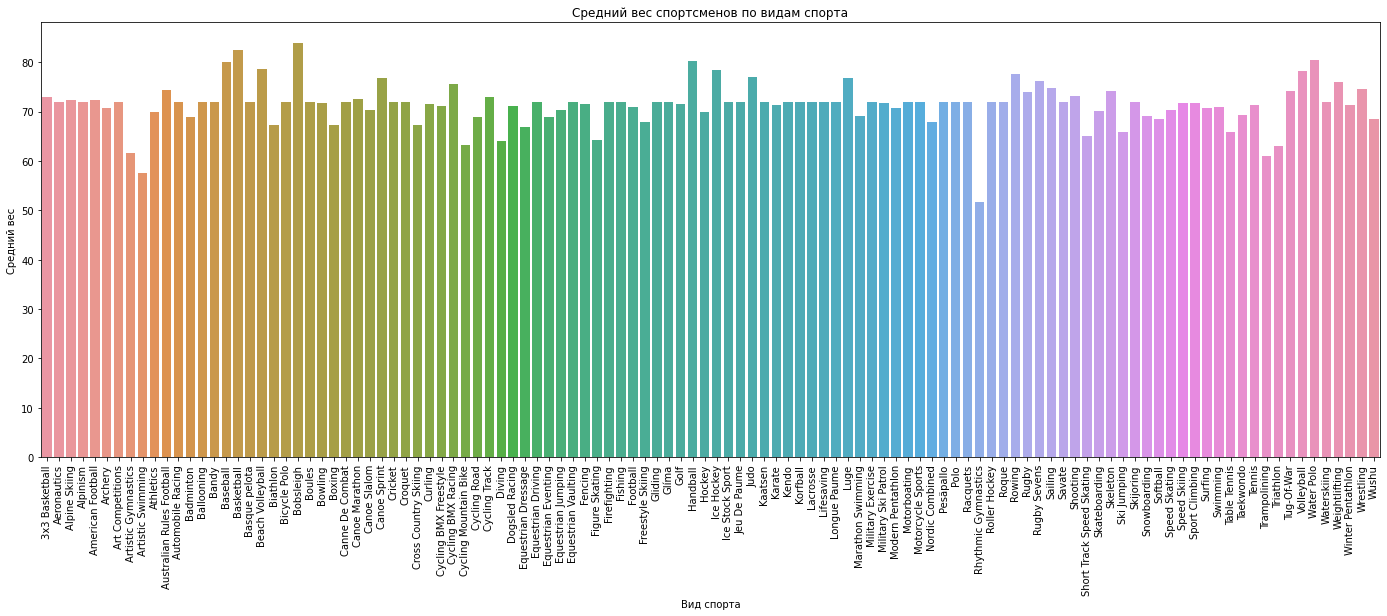

In [188]:
# Группировка данных по видам спорта и вычисление среднего роста
sport_height_stats = merged_5.groupby('sport').agg({
    'weight': 'mean'
}).reset_index()

# Визуализация результатов
plt.figure(figsize=(24, 8))
sns.barplot(data=sport_height_stats, x='sport', y='weight')
plt.title('Средний вес спортсменов по видам спорта')
plt.xlabel('Вид спорта')
plt.ylabel('Средний вес')
plt.xticks(rotation=90)
plt.show()


In [189]:
country_medals = medal_tally.groupby('country').agg({
    'gold': 'sum',
    'silver': 'sum',
    'bronze': 'sum'
}).reset_index()

country_medals_sorted_gold = country_medals.sort_values(by='gold', ascending=False)
country_medals_sorted_silver = country_medals.sort_values(by='silver', ascending=False)
country_medals_sorted_bronze = country_medals.sort_values(by='bronze', ascending=False)

In [190]:
top_5_gold = country_medals_sorted_gold.head(10)
top_5_silver = country_medals_sorted_silver.head(10)
top_5_bronze = country_medals_sorted_bronze.head(10)

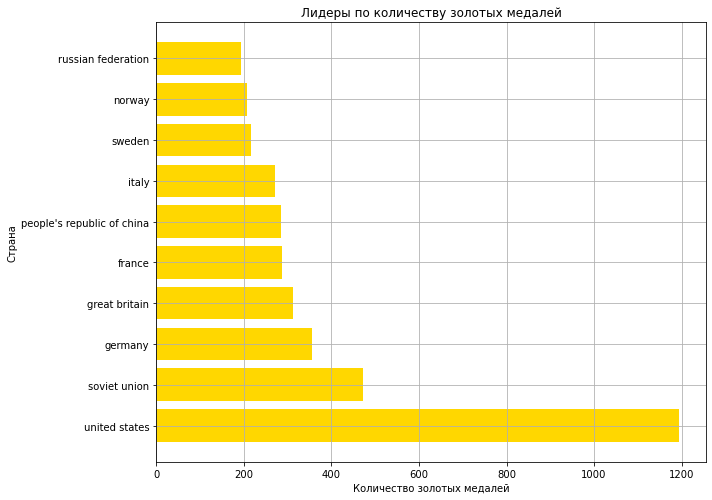

In [191]:
plt.figure(figsize=(10, 20))
plt.subplot(3, 1, 1)
plt.barh(top_5_gold['country'], top_5_gold['gold'], color='gold')
plt.title('Лидеры по количеству золотых медалей')
plt.xlabel('Количество золотых медалей')
plt.ylabel('Страна')
plt.grid(True)
plt.tight_layout()
plt.show()

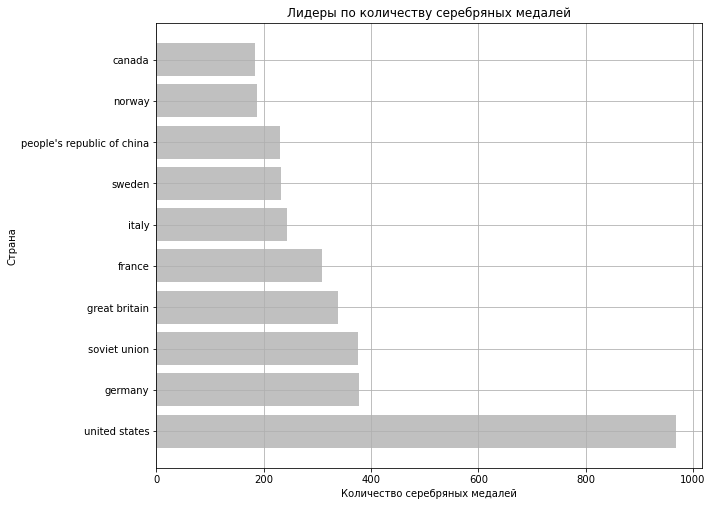

In [192]:
plt.figure(figsize=(10, 20))
plt.subplot(3, 1, 2)
plt.barh(top_5_silver['country'], top_5_silver['silver'], color='silver')
plt.title('Лидеры по количеству серебряных медалей')
plt.xlabel('Количество серебряных медалей')
plt.ylabel('Страна')
plt.grid(True)
plt.tight_layout()
plt.show()

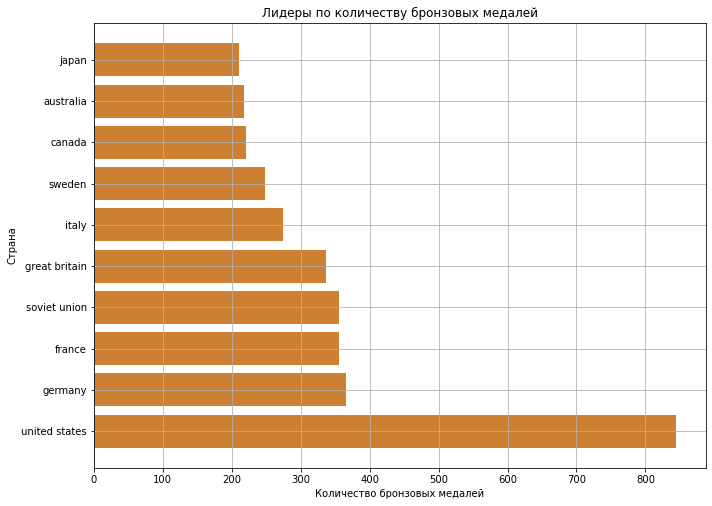

In [193]:
plt.figure(figsize=(10, 20))
plt.subplot(3, 1, 3)
plt.barh(top_5_bronze['country'], top_5_bronze['bronze'], color='#CD7F32')  # Цвет бронзы
plt.title('Лидеры по количеству бронзовых медалей')
plt.xlabel('Количество бронзовых медалей')
plt.ylabel('Страна')
plt.grid(True)
plt.tight_layout()
plt.show()

In [194]:
# Объединение данных
merged_7 = pd.merge(athlete_bio, event_details, on='athlete_id', how='inner')
merged_7 = pd.merge(merged_7, games_summary[['edition_id', 'year']], on='edition_id', how='inner')

# Агрегация данных по годам и странам
participation_data = merged_7.groupby(['year', 'country']).size().reset_index(name='participants')
sports_data = merged_7.groupby(['year', 'country', 'sport']).size().reset_index()

# Подсчет количества видов спорта по годам и странам
sports_count_data = sports_data.groupby(['year', 'country']).size().reset_index(name='sports_count')


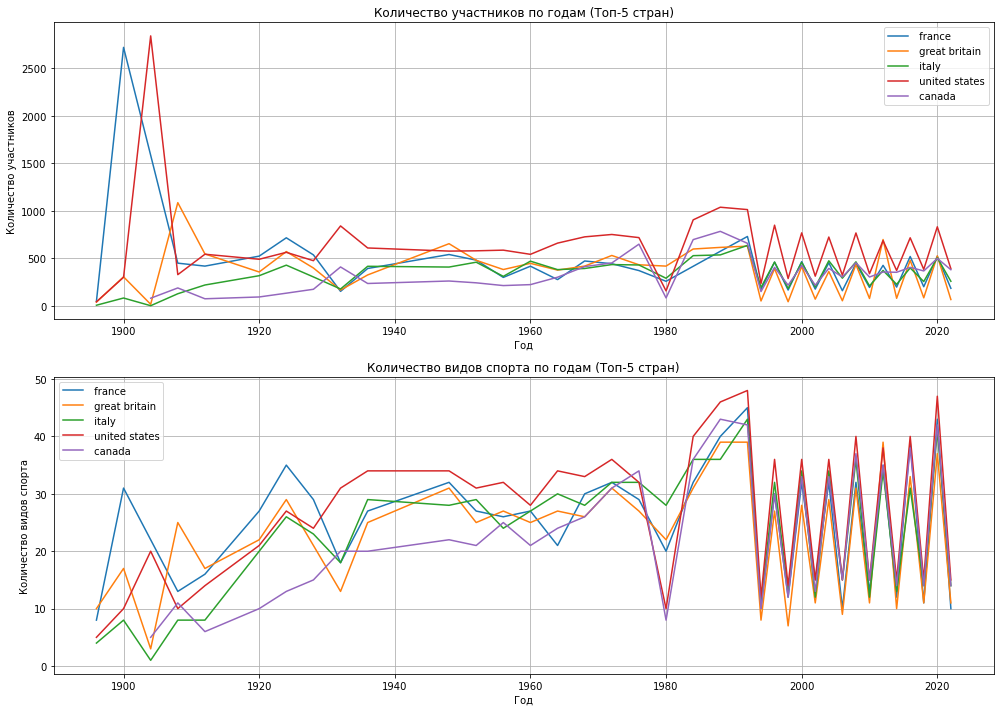

In [195]:
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
top_countries_participants = participation_data.groupby('country').sum().sort_values(by='participants', ascending=False).head(5).index
filtered_participation_data = participation_data[participation_data['country'].isin(top_countries_participants)]
for country in filtered_participation_data['country'].unique():
    country_data = filtered_participation_data[filtered_participation_data['country'] == country]
    plt.plot(country_data['year'], country_data['participants'], label=country)

plt.title('Количество участников по годам (Топ-5 стран)')
plt.xlabel('Год')
plt.ylabel('Количество участников')
plt.legend()
plt.grid(True)

# График количества видов спорта по годам и странам
plt.subplot(2, 1, 2)
top_countries_sports = sports_count_data.groupby('country').sum().sort_values(by='sports_count', ascending=False).head(5).index
filtered_sports_count_data = sports_count_data[sports_count_data['country'].isin(top_countries_sports)]

for country in filtered_sports_count_data['country'].unique():
    country_data = filtered_sports_count_data[filtered_sports_count_data['country'] == country]
    plt.plot(country_data['year'], country_data['sports_count'], label=country)

plt.title('Количество видов спорта по годам (Топ-5 стран)')
plt.xlabel('Год')
plt.ylabel('Количество видов спорта')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [196]:
merged_7 = merged_7.rename(columns={'country_noc_x': 'country_noc'})
# Агрегация данных по годам
participants_per_year = merged_7.groupby('year').size().reset_index(name='participants')
countries_per_year = merged_7.groupby(['year', 'country_noc']).size().groupby('year').size().reset_index(name='countries')

In [197]:
participants_per_year = merged_7.groupby('year').size().reset_index(name='participants')
countries_per_year = merged_7.groupby(['year', 'country_noc']).size().groupby('year').size().reset_index(name='countries')
events_per_year = event_details.groupby(['edition_id', 'event']).size().groupby('edition_id').size().reset_index(name='events')
events_per_year = pd.merge(events_per_year, games_summary[['edition_id', 'year']], on='edition_id', how='inner')

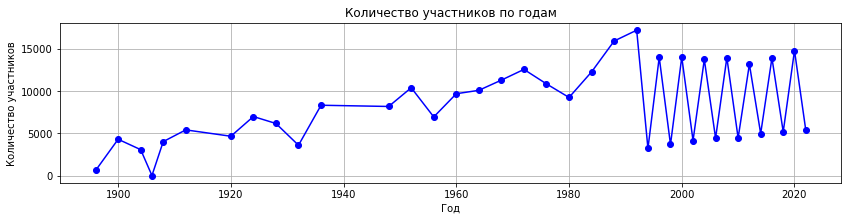

In [198]:
# Построение графиков
plt.figure(figsize=(14, 10))

# График количества участников по годам
plt.subplot(3, 1, 1)
plt.plot(participants_per_year['year'], participants_per_year['participants'], marker='o', linestyle='-', color='b')
plt.title('Количество участников по годам')
plt.xlabel('Год')
plt.ylabel('Количество участников')
plt.grid(True)

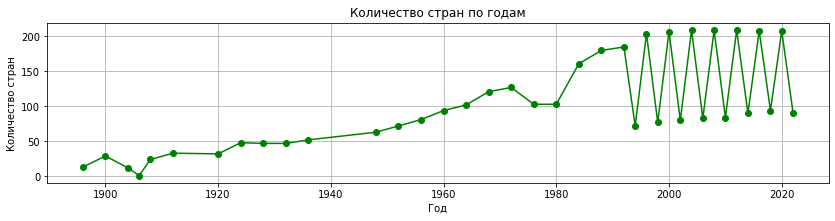

In [199]:
# График количества стран по годам
plt.figure(figsize=(14, 10))
plt.subplot(3, 1, 2)
plt.plot(countries_per_year['year'], countries_per_year['countries'], marker='o', linestyle='-', color='g')
plt.title('Количество стран по годам')
plt.xlabel('Год')
plt.ylabel('Количество стран')
plt.grid(True)

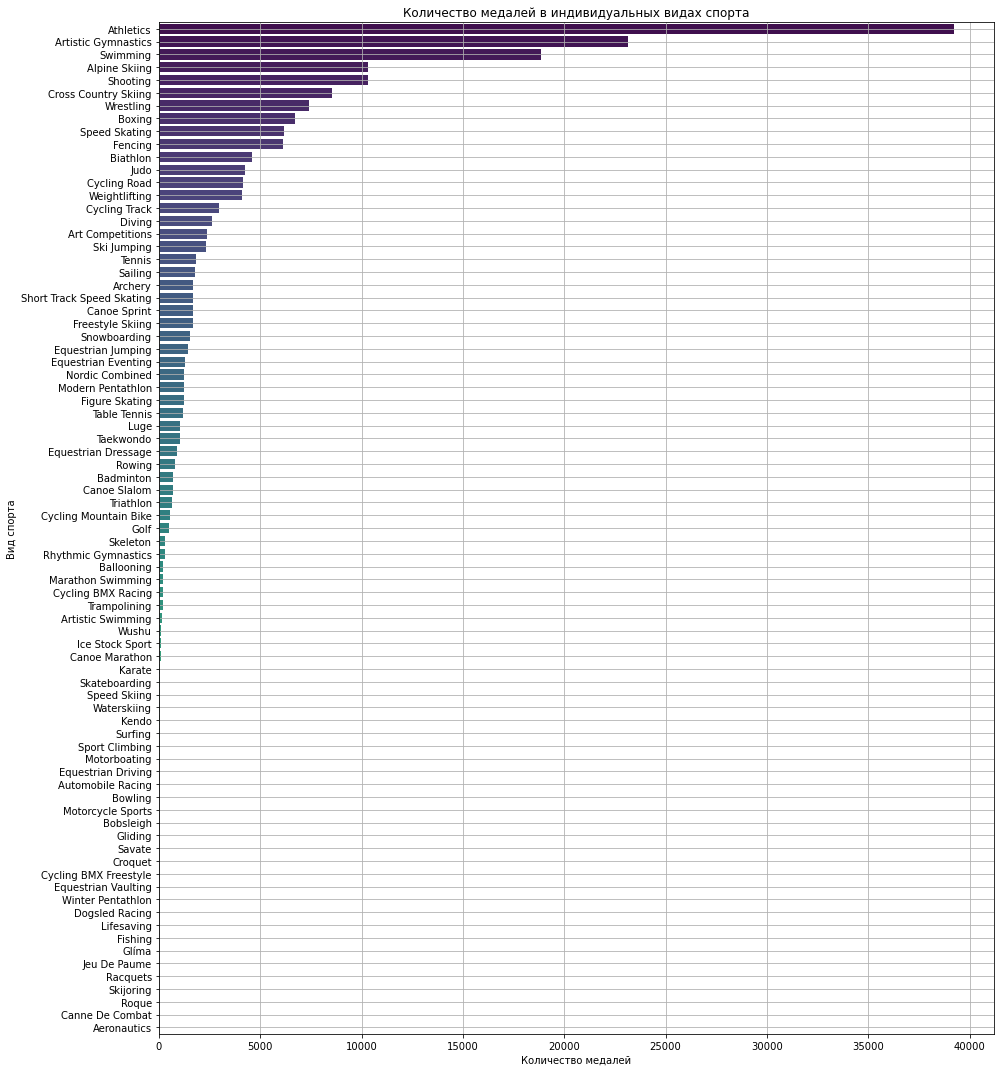

In [200]:
merged_9 = pd.merge(athlete_bio, event_details, on='athlete_id', how='inner')

# Фильтрация данных для индивидуальных видов спорта
# Предположим, что индивидуальные виды спорта можно определить по отсутствию командных событий
individual_sports = merged_9[merged_9['isTeamSport'] == False]

# Группировка данных по видам спорта и вычисление количества медалей для каждого вида спорта
sport_medal_counts = individual_sports.groupby('sport').agg({
    'medal': 'count'
}).reset_index()

# Переименование столбца для удобства
sport_medal_counts = sport_medal_counts.rename(columns={'medal': 'Medal_Count'})

# Сортировка видов спорта по количеству медалей
sport_medal_counts = sport_medal_counts.sort_values(by='Medal_Count', ascending=False)

# Визуализация результатов
plt.figure(figsize=(14, 15))
sns.barplot(data=sport_medal_counts, x='Medal_Count', y='sport', palette='viridis', orient='h')
plt.title('Количество медалей в индивидуальных видах спорта')
plt.xlabel('Количество медалей')
plt.ylabel('Вид спорта')
plt.grid(True)
plt.tight_layout()
plt.show()

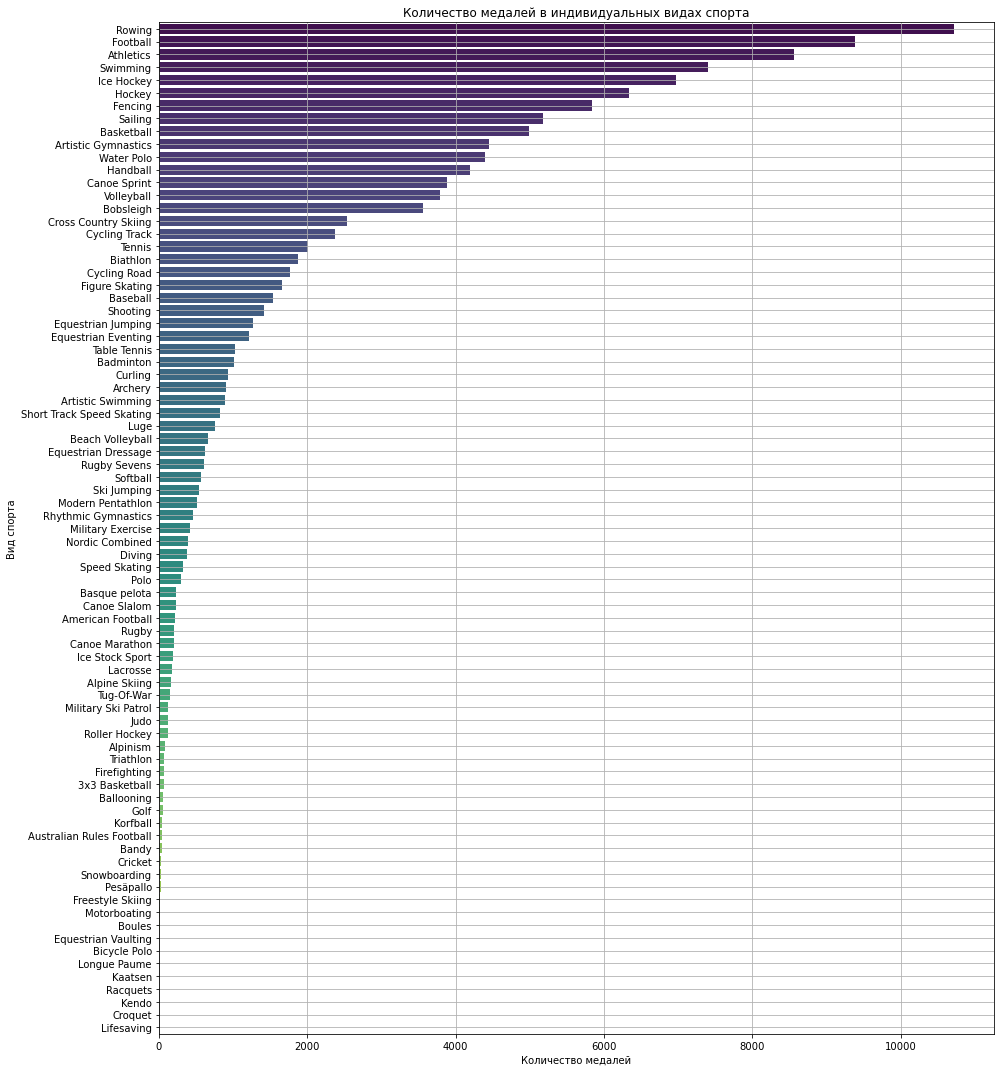

In [213]:
merged_9 = pd.merge(athlete_bio, event_details, on='athlete_id', how='inner')

# Фильтрация данных для индивидуальных видов спорта
# Предположим, что индивидуальные виды спорта можно определить по отсутствию командных событий
individual_sports = merged_9[merged_9['isTeamSport'] == True]

# Группировка данных по видам спорта и вычисление количества медалей для каждого вида спорта
sport_medal_counts = individual_sports.groupby('sport').agg({
    'medal': 'count'
}).reset_index()

# Переименование столбца для удобства
sport_medal_counts = sport_medal_counts.rename(columns={'medal': 'Medal_Count'})

# Сортировка видов спорта по количеству медалей
sport_medal_counts = sport_medal_counts.sort_values(by='Medal_Count', ascending=False)

# Визуализация результатов
plt.figure(figsize=(14, 15))
sns.barplot(data=sport_medal_counts, x='Medal_Count', y='sport', palette='viridis', orient='h')
plt.title('Количество медалей в индивидуальных видах спорта')
plt.xlabel('Количество медалей')
plt.ylabel('Вид спорта')
plt.grid(True)
plt.tight_layout()
plt.show()

In [214]:
filtered_event_details = event_details[event_details['medal'].isin(['Gold', 'Silver', 'Bronze'])]

# Агрегация данных о медалях по спортсменам
medal_counts = filtered_event_details.groupby('athlete_id').size().reset_index(name='total_medals')

# Объединение с биографической информацией для получения имени спортсмена
medal_counts = pd.merge(medal_counts, athlete_bio, on='athlete_id', how='inner')

# Сортировка спортсменов по количеству медалей
medal_counts = medal_counts.sort_values(by='total_medals', ascending=False)

# Вывод топ-10 спортсменов с наибольшим количеством медалей
print("Участники с наибольшим количеством медалей:")
print(medal_counts[['name', 'total_medals','country']].head(10))

Участники с наибольшим количеством медалей:
                       name  total_medals                 country
20566        Michael Phelps            28           united states
6874        Larisa Latynina            18            soviet union
7618      Nikolay Andrianov            15            soviet union
22060         Marit Bjørgen            15                  norway
18687  Ole Einar Bjørndalen            13                  norway
23787            Ireen Wüst            13             netherlands
7374            Takashi Ono            13                   japan
7650         Boris Shakhlin            13   soviet union  ukraine
5354    Edoardo Mangiarotti            13                   italy
7361             Sawao Kato            12                   japan


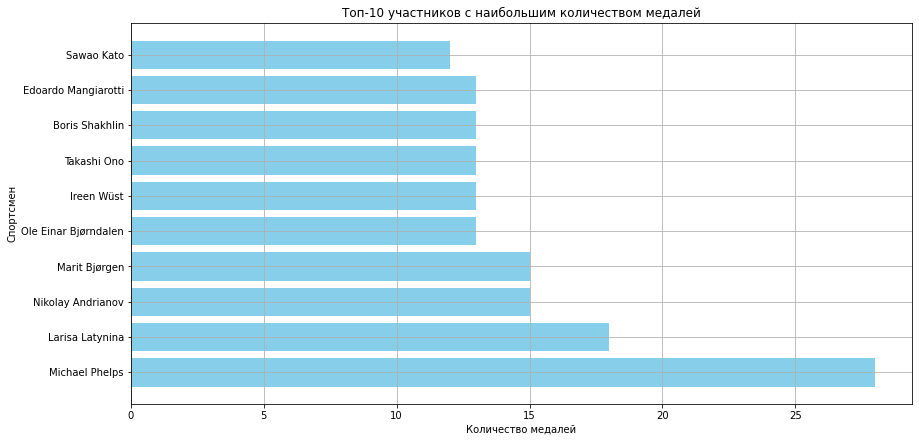

In [215]:
top_10_athletes = medal_counts.head(10)
# Построение графика
plt.figure(figsize=(14, 7))
plt.barh(top_10_athletes['name'], top_10_athletes['total_medals'], color='skyblue')
plt.xlabel('Количество медалей')
plt.ylabel('Спортсмен')
plt.title('Топ-10 участников с наибольшим количеством медалей')
plt.grid(True)
plt.show()

In [216]:
# Фильтрация данных для медалей
filtered_event_details = event_details[event_details['medal'].isin(['Gold', 'Silver', 'Bronze'])]

# Агрегация данных о медалях по спортсменам
medal_counts = filtered_event_details.groupby('athlete_id').size().reset_index(name='total_medals')

# Объединение с биографической информацией для получения имени и пола спортсмена
medal_counts = pd.merge(medal_counts, athlete_bio[['athlete_id', 'name', 'sex', 'country']], on='athlete_id', how='inner')

# Сортировка спортсменов по количеству медалей
medal_counts = medal_counts.sort_values(by='total_medals', ascending=False)

# Выбор топ-5 мужчин и женщин
top_5_men = medal_counts[medal_counts['sex'] == 'Male'].head(5)
top_5_women = medal_counts[medal_counts['sex'] == 'Female'].head(5)

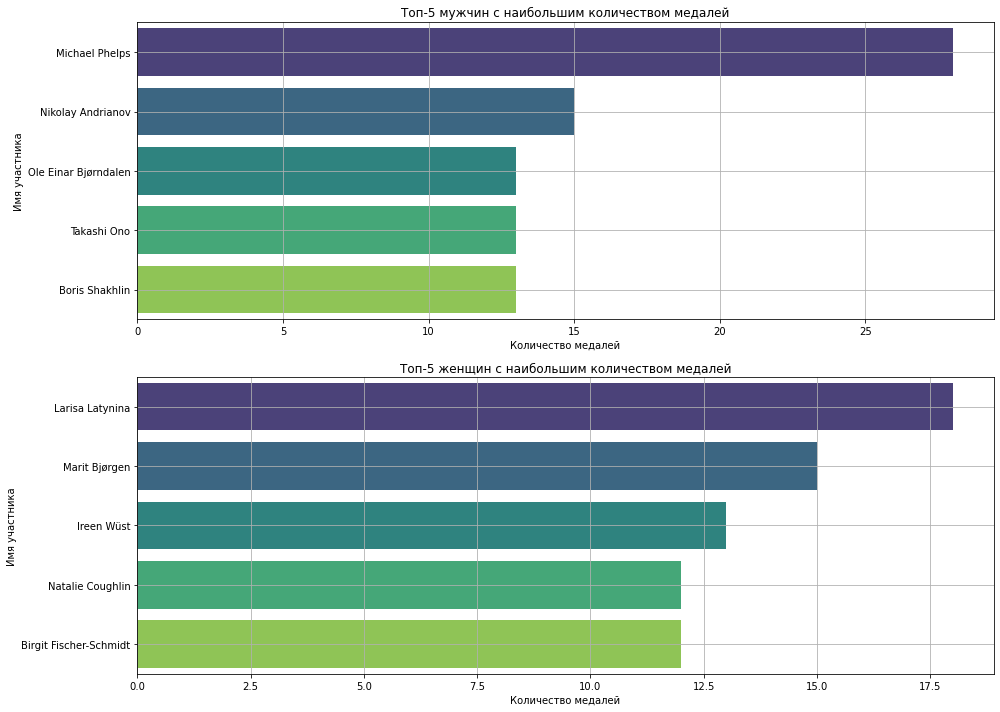

In [217]:
plt.figure(figsize=(14, 10))

# График для топ-5 мужчин
plt.subplot(2, 1, 1)
sns.barplot(data=top_5_men, x='total_medals', y='name', palette='viridis', orient='h')
plt.title('Топ-5 мужчин с наибольшим количеством медалей')
plt.xlabel('Количество медалей')
plt.ylabel('Имя участника')
plt.grid(True)

# График для топ-5 женщин
plt.subplot(2, 1, 2)
sns.barplot(data=top_5_women, x='total_medals', y='name', palette='viridis', orient='h')
plt.title('Топ-5 женщин с наибольшим количеством медалей')
plt.xlabel('Количество медалей')
plt.ylabel('Имя участника')
plt.grid(True)

plt.tight_layout()
plt.show()

In [218]:
merged_data = pd.merge(athlete_bio, event_details, on='athlete_id', how='inner')
merged_data = pd.merge(merged_data, games_summary[['edition_id', 'year']], on='edition_id', how='inner')

In [219]:
# Расчет возраста спортсмено

# Расчет BMI
merged_data['height_m'] = merged_data['height'] / 100  # Перевод роста из см в м
merged_data['BMI'] = merged_data['weight'] / (merged_data['height_m'] ** 2)

# Фильтрация данных, чтобы учитывать только золотые, серебряные и бронзовые медали
filtered_event_details = merged_data[merged_data['medal'].isin(['Gold', 'Silver', 'Bronze'])]

# Агрегация данных о медалях по спортсменам
medal_counts = filtered_event_details.groupby('athlete_id').size().reset_index(name='total_medals')

# Объединение данных о количестве медалей с основными данными
merged_data = pd.merge(merged_data, medal_counts, on='athlete_id', how='left')

# Удаление дубликатов, чтобы каждый спортсмен был представлен один раз
unique_athletes = merged_data.drop_duplicates(subset=['athlete_id'])

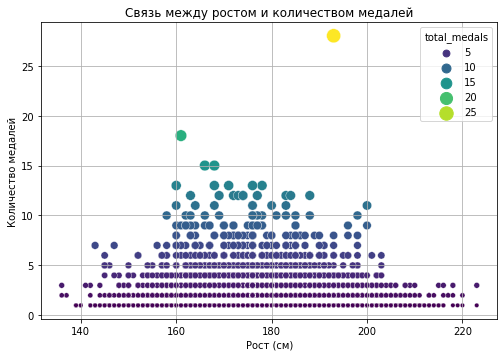

In [220]:
# График связи между ростом и количеством медалей
plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 2)
sns.scatterplot(data=unique_athletes, x='height', y='total_medals', hue='total_medals', palette='viridis', size='total_medals', sizes=(20, 200))
plt.title('Связь между ростом и количеством медалей')
plt.xlabel('Рост (см)')
plt.ylabel('Количество медалей')
plt.grid(True)


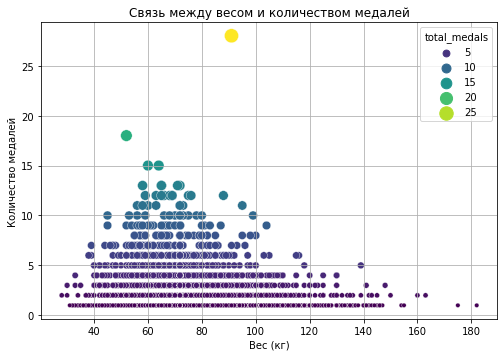

In [221]:
# График связи между весом и количеством медалей
plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 3)
sns.scatterplot(data=unique_athletes, x='weight', y='total_medals', hue='total_medals', palette='viridis', size='total_medals', sizes=(20, 200))
plt.title('Связь между весом и количеством медалей')
plt.xlabel('Вес (кг)')
plt.ylabel('Количество медалей')
plt.grid(True)

In [222]:
merged_10 = pd.merge(athlete_bio, event_details, on='athlete_id', how='inner')
merged_10 = pd.merge(merged_10, games_summary[['edition_id', 'year']], on='edition_id', how='inner')

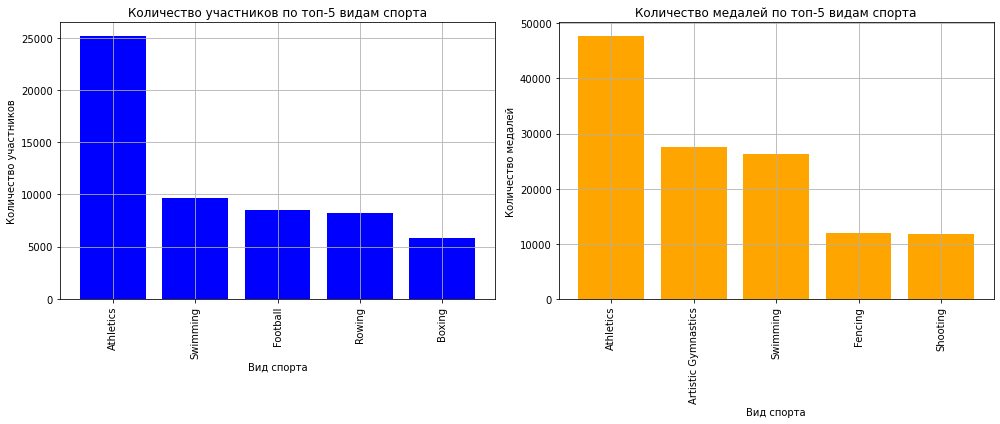

In [223]:
# Агрегация данных по видам спорта
sport_data = merged_data.groupby('sport').agg({
    'athlete_id': 'nunique',  # Количество участников
    'medal': lambda x: x.notnull().sum()  # Количество медалей
}).reset_index()

# Выбор топ-5 видов спорта по количеству участников
top_5_sports_participants = sport_data.nlargest(5, 'athlete_id')

# Выбор топ-5 видов спорта по количеству медалей
top_5_sports_medals = sport_data.nlargest(5, 'medal')

# Построение графиков
plt.figure(figsize=(14, 6))

# График количества участников по топ-5 видам спорта
plt.subplot(1, 2, 1)
plt.bar(top_5_sports_participants['sport'], top_5_sports_participants['athlete_id'], color='blue')
plt.title('Количество участников по топ-5 видам спорта')
plt.xlabel('Вид спорта')
plt.ylabel('Количество участников')
plt.xticks(rotation=90)
plt.grid(True)

# График количества медалей по топ-5 видам спорта
plt.subplot(1, 2, 2)
plt.bar(top_5_sports_medals['sport'], top_5_sports_medals['medal'], color='orange')
plt.title('Количество медалей по топ-5 видам спорта')
plt.xlabel('Вид спорта')
plt.ylabel('Количество медалей')
plt.xticks(rotation=90)
plt.grid(True)

plt.tight_layout()
plt.show()

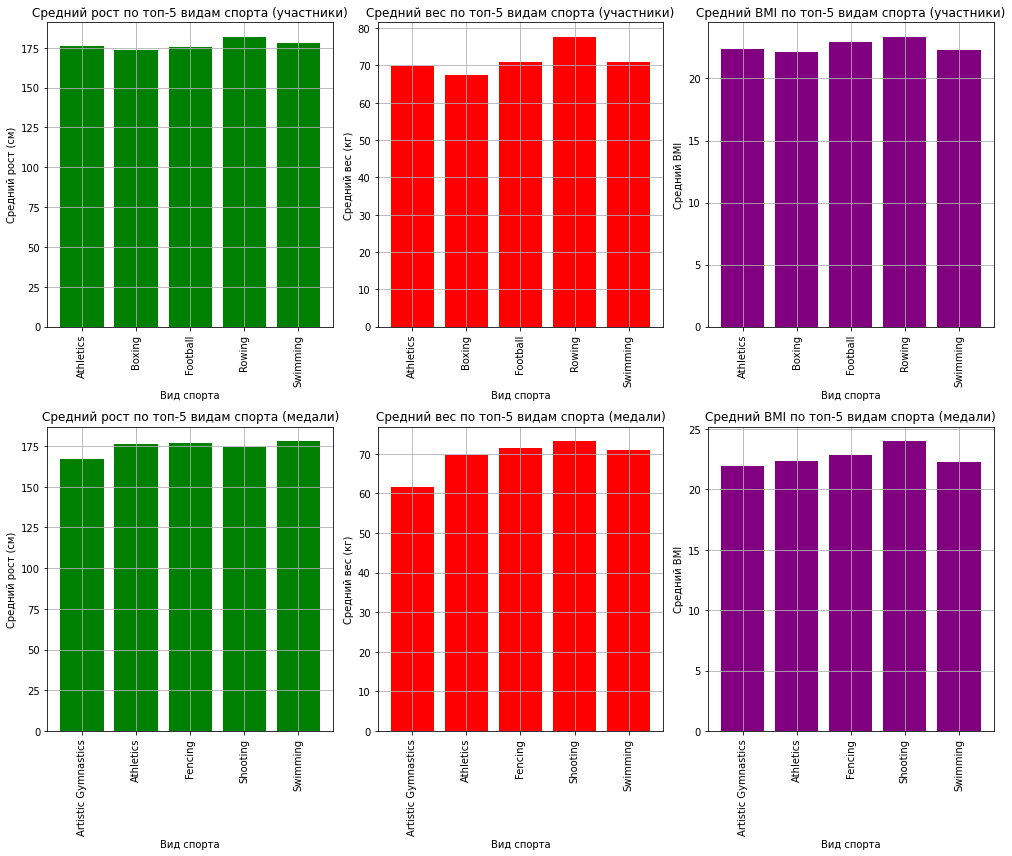

In [224]:
# Расчет BMI
merged_data['height_m'] = merged_data['height'] / 100  # Перевод роста из см в м
merged_data['BMI'] = merged_data['weight'] / (merged_data['height_m'] ** 2)

# Агрегация данных по топ-5 видам спорта по количеству участников
top_5_sports_physical_participants = merged_data[merged_data['sport'].isin(top_5_sports_participants['sport'])].groupby('sport').agg({
    'height': 'mean',  # Средний рост
    'weight': 'mean',  # Средний вес
    'BMI': 'mean'      # Средний BMI
}).reset_index()

# Агрегация данных по топ-5 видам спорта по количеству медалей
top_5_sports_physical_medals = merged_data[merged_data['sport'].isin(top_5_sports_medals['sport'])].groupby('sport').agg({
    'height': 'mean',  # Средний рост
    'weight': 'mean',  # Средний вес
    'BMI': 'mean'      # Средний BMI
}).reset_index()

# Построение графиков
plt.figure(figsize=(14, 12))

# Графики физических характеристик по топ-5 видам спорта по количеству участников
plt.subplot(2, 3, 1)
plt.bar(top_5_sports_physical_participants['sport'], top_5_sports_physical_participants['height'], color='green')
plt.title('Средний рост по топ-5 видам спорта (участники)')
plt.xlabel('Вид спорта')
plt.ylabel('Средний рост (см)')
plt.xticks(rotation=90)
plt.grid(True)

plt.subplot(2, 3, 2)
plt.bar(top_5_sports_physical_participants['sport'], top_5_sports_physical_participants['weight'], color='red')
plt.title('Средний вес по топ-5 видам спорта (участники)')
plt.xlabel('Вид спорта')
plt.ylabel('Средний вес (кг)')
plt.xticks(rotation=90)
plt.grid(True)

plt.subplot(2, 3, 3)
plt.bar(top_5_sports_physical_participants['sport'], top_5_sports_physical_participants['BMI'], color='purple')
plt.title('Средний BMI по топ-5 видам спорта (участники)')
plt.xlabel('Вид спорта')
plt.ylabel('Средний BMI')
plt.xticks(rotation=90)
plt.grid(True)

# Графики физических характеристик по топ-5 видам спорта по количеству медалей
plt.subplot(2, 3, 4)
plt.bar(top_5_sports_physical_medals['sport'], top_5_sports_physical_medals['height'], color='green')
plt.title('Средний рост по топ-5 видам спорта (медали)')
plt.xlabel('Вид спорта')
plt.ylabel('Средний рост (см)')
plt.xticks(rotation=90)
plt.grid(True)

plt.subplot(2, 3, 5)
plt.bar(top_5_sports_physical_medals['sport'], top_5_sports_physical_medals['weight'], color='red')
plt.title('Средний вес по топ-5 видам спорта (медали)')
plt.xlabel('Вид спорта')
plt.ylabel('Средний вес (кг)')
plt.xticks(rotation=90)
plt.grid(True)

plt.subplot(2, 3, 6)
plt.bar(top_5_sports_physical_medals['sport'], top_5_sports_physical_medals['BMI'], color='purple')
plt.title('Средний BMI по топ-5 видам спорта (медали)')
plt.xlabel('Вид спорта')
plt.ylabel('Средний BMI')
plt.xticks(rotation=90)
plt.grid(True)

plt.tight_layout()
plt.show()